# Librerias

In [1]:
import pandas as pd
import numpy as np
import datetime
import re

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

url del dataset = https://www.kaggle.com/datasets/naumanaarif/csgo-pro-players-dataset/suggestions?status=pending&yourSuggestions=true

# Exploración de los datos

In [2]:
df_pros = pd.read_csv("Data/csgo_players.csv")
df_backup = pd.read_csv("Data/csgo_players.csv")

In [3]:
df_pros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          811 non-null    int64  
 1   nickname                           811 non-null    object 
 2   real_name                          811 non-null    object 
 3   age                                811 non-null    int64  
 4   country                            811 non-null    object 
 5   current_team                       514 non-null    object 
 6   teams                              811 non-null    object 
 7   total_kills                        811 non-null    int64  
 8   total_deaths                       811 non-null    int64  
 9   headshot_percentage                811 non-null    object 
 10  damage_per_round                   811 non-null    float64
 11  grenade_dmg_per_round              811 non-null    float64

In [4]:
df_pros.drop(columns="current_team", inplace=True)
df_pros.drop(columns="real_name", inplace=True)
df_pros.drop(columns="player_id", inplace=True)

In [5]:
df_pros.head()

nickname  age  country                      teams  total_kills  \
0    ZywOo   21   France              Vitality, aAa        22622   
1   s1mple   24  Ukraine              Natus Vincere        35512   
2    sh1ro   21   Russia  Gambit Youngsters, Gambit        18091   
3     deko   21   Russia                       1WIN         8738   
4   saffee   27   Brazil                FURIA, paiN         8482   

   total_deaths headshot_percentage  damage_per_round  grenade_dmg_per_round  \
0         16458               41.2%              88.0                    3.6   
1         26413               41.3%              86.4                    2.4   
2         12492               27.8%              78.6                    3.9   
3          6397               36.7%              80.4                    3.4   
4          6517               30.9%              80.2                    3.0   

   maps_played  ...  3_kill_rounds  4_kill_rounds  5_kill_rounds  rifle_kills  \
0         1020  ...           1474            369             71         8261   
1         1571  ...           2262            504             64        14717   
2          884  ...           1075            221             30         3791   
3          404  ...            518            112              8         2664   
4          404  ...            524            114             14         2545   

   sniper_kills  smg_kills  pistol_kills  grenade_kills other_kills  rating  
0          8552       1290          4262            260          49    1.32  
1         13451        901          6057            199         254    1.25  
2         10580        550          3008            175          70    1.26  
3          4348        181          1459             86          40    1.23  
4          4412        264          1209             52          28    1.22  

[5 rows x 38 columns]

In [6]:
df_numeric = df_pros.select_dtypes(np.number)
df_numeric.describe()

age   total_kills  total_deaths  damage_per_round  \
count  811.000000    811.000000    811.000000        811.000000   
mean    25.852035  15324.868064  14734.414303         75.110727   
std      3.697220   7616.041119   7092.810830          4.121221   
min     17.000000   5530.000000   6166.000000         59.700000   
25%     23.000000   9222.000000   9116.000000         72.400000   
50%     26.000000  13308.000000  12900.000000         74.900000   
75%     28.000000  19404.000000  18366.500000         77.750000   
max     36.000000  40979.000000  38534.000000         91.700000   

       grenade_dmg_per_round  maps_played  rounds_played  kills_per_death  \
count             811.000000   811.000000     811.000000       811.000000   
mean                4.073243   843.347719   22172.040691         1.035487   
std                 1.187595   406.503953   10719.501993         0.091612   
min                 1.400000   379.000000    9815.000000         0.740000   
25%                 3.200000   509.000000   13459.000000         0.980000   
50%                 3.900000   738.000000   19559.000000         1.030000   
75%                 4.800000  1073.000000   28229.000000         1.095000   
max                 9.200000  2219.000000   58263.000000         1.450000   

       kills_per_round  assists_per_round  ...  3_kill_rounds  4_kill_rounds  \
count       811.000000         811.000000  ...     811.000000     811.000000   
mean          0.688385           0.130678  ...     820.546239     160.884094   
std           0.044627           0.017692  ...     428.725129      89.041086   
min           0.520000           0.080000  ...     192.000000      33.000000   
25%           0.660000           0.120000  ...     483.500000      94.000000   
50%           0.690000           0.130000  ...     689.000000     136.000000   
75%           0.720000           0.140000  ...    1044.500000     207.000000   
max           0.860000           0.180000  ...    2414.000000     564.000000   

       5_kill_rounds   rifle_kills  sniper_kills    smg_kills  pistol_kills  \
count     811.000000    811.000000    811.000000   811.000000    811.000000   
mean       17.027127   9498.584464   2115.836005   840.594328   2643.271270   
std        10.830193   5615.356769   3356.026270   513.481262   1322.528164   
min         0.000000   1140.000000      7.000000   105.000000    669.000000   
25%         9.000000   5474.000000    206.000000   465.500000   1608.500000   
50%        15.000000   7797.000000    583.000000   722.000000   2239.000000   
75%        23.000000  12665.500000   2665.500000  1097.500000   3306.000000   
max        71.000000  30174.000000  20663.000000  3495.000000   7496.000000   

       grenade_kills  other_kills      rating  
count     811.000000   811.000000  811.000000  
mean      197.348952    65.076449    1.034488  
std       124.400360    75.641726    0.072618  
min        40.000000     3.000000    0.770000  
25%       108.000000    26.500000    0.990000  
50%       164.000000    45.000000    1.030000  
75%       248.500000    75.000000    1.080000  
max      1003.000000  1001.000000    1.320000  

[8 rows x 31 columns]

# Visualización

<Figure size 1500x1000 with 0 Axes>

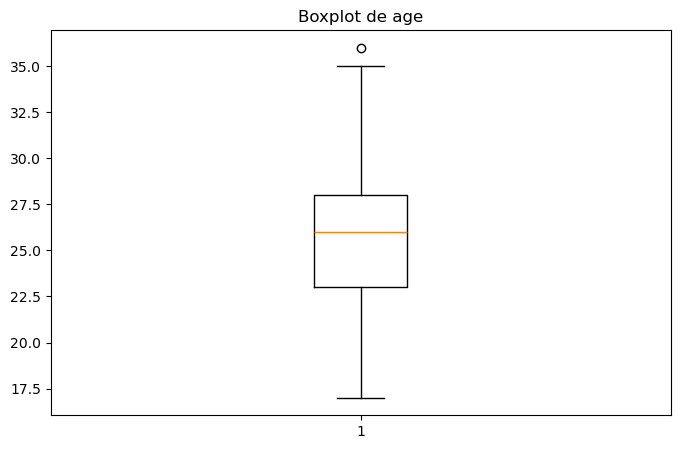

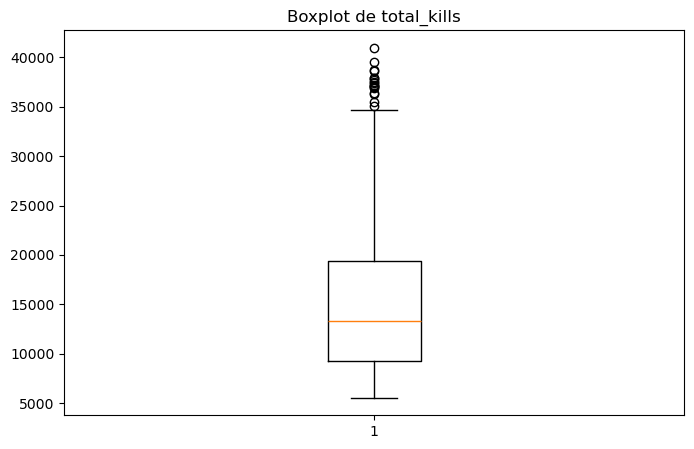

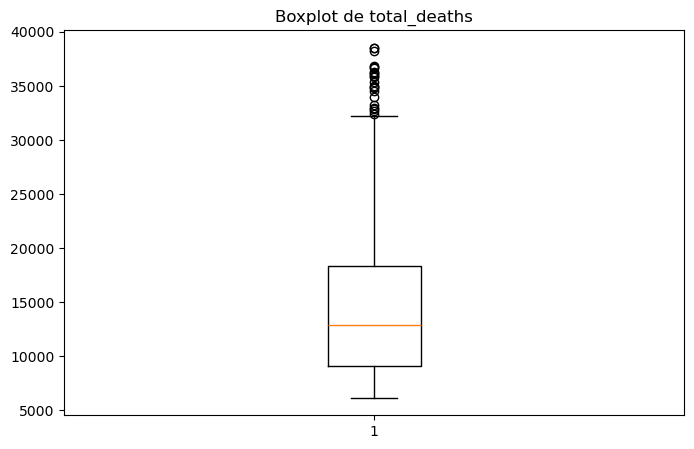

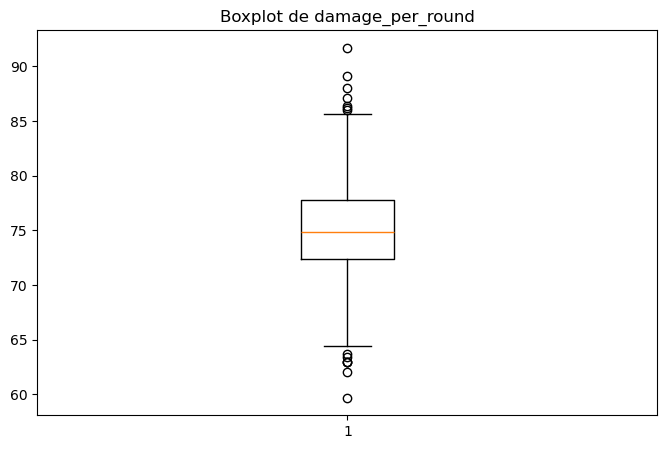

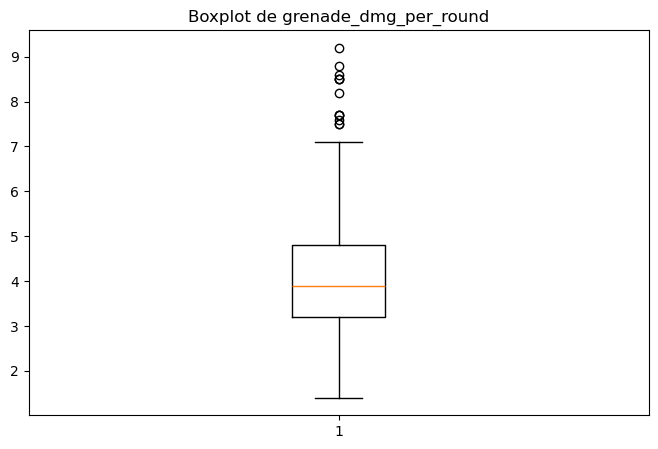

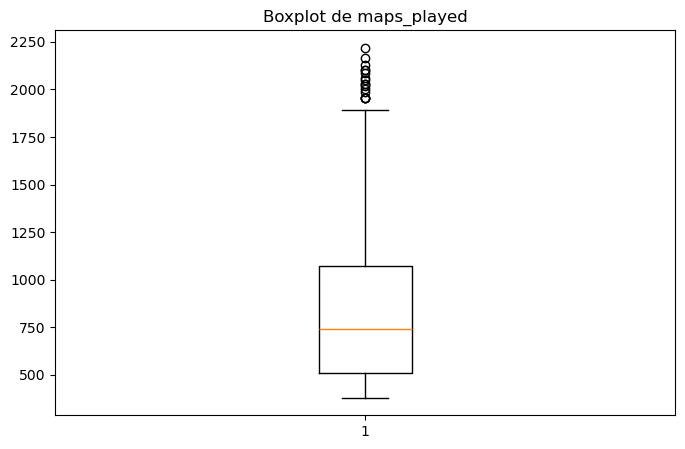

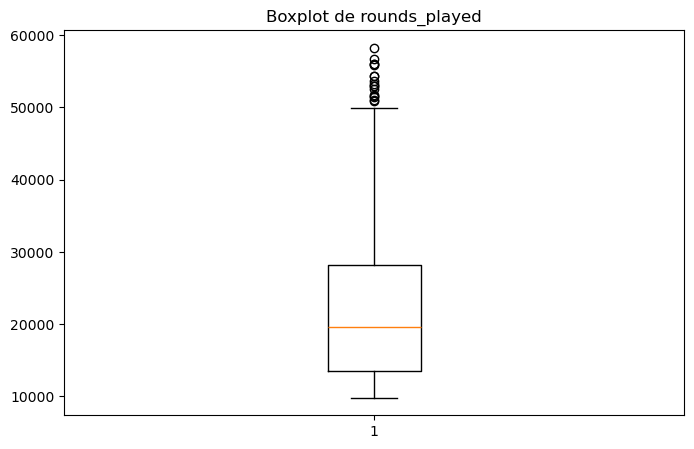

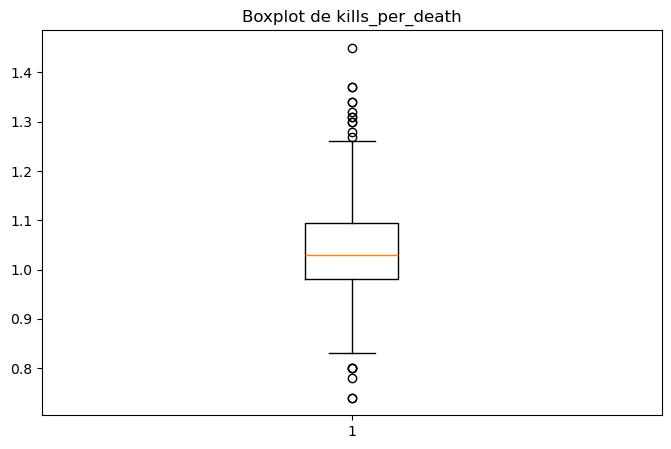

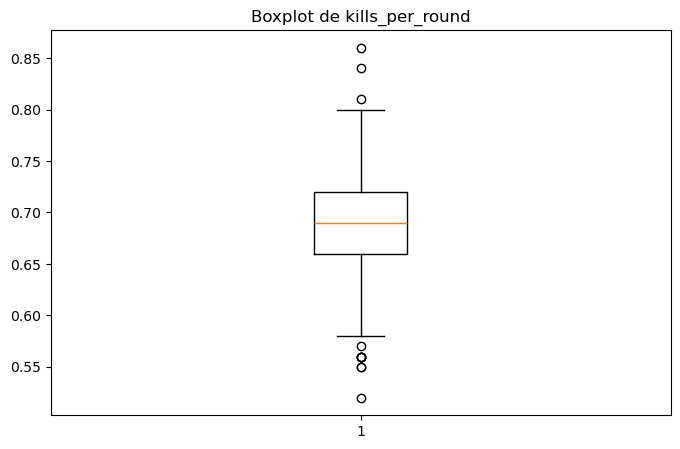

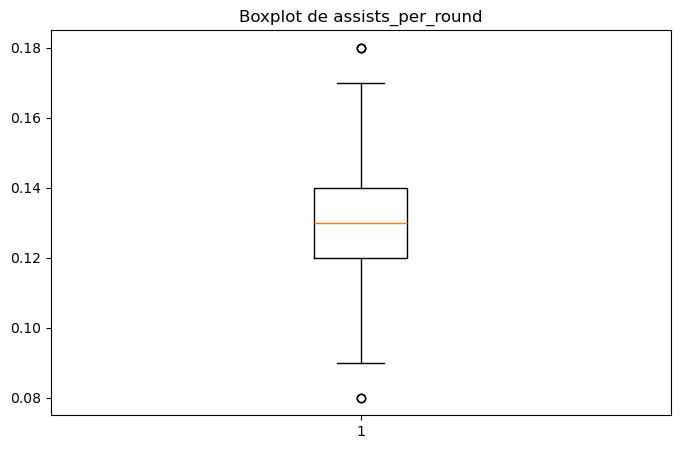

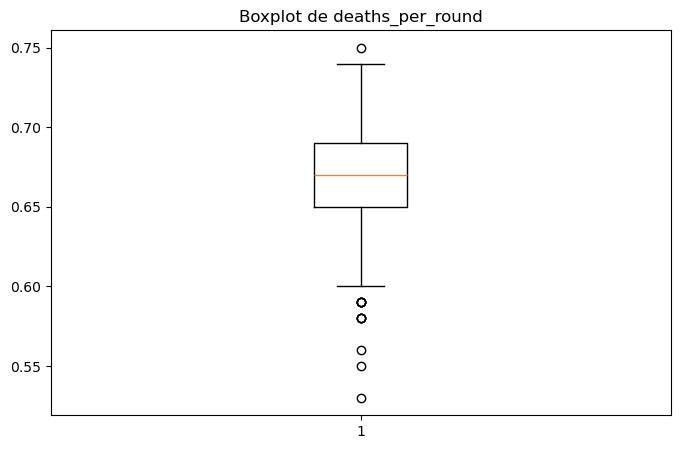

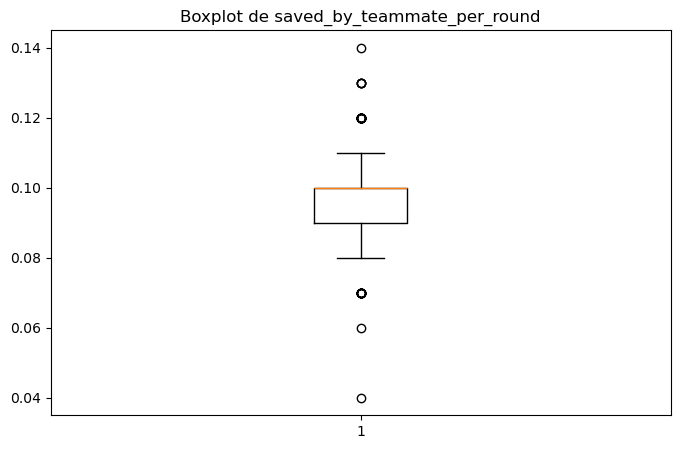

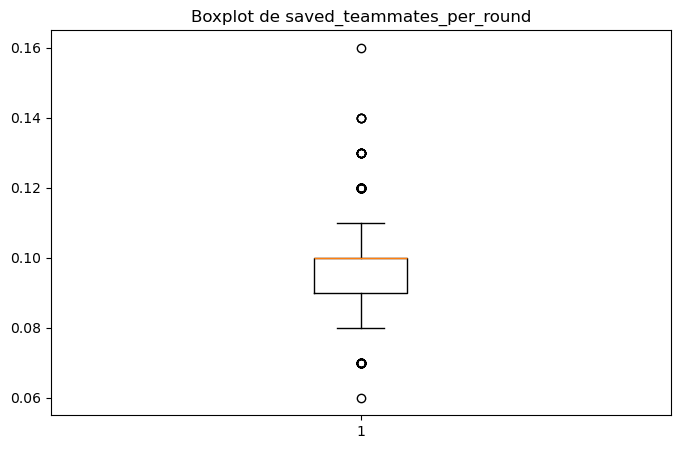

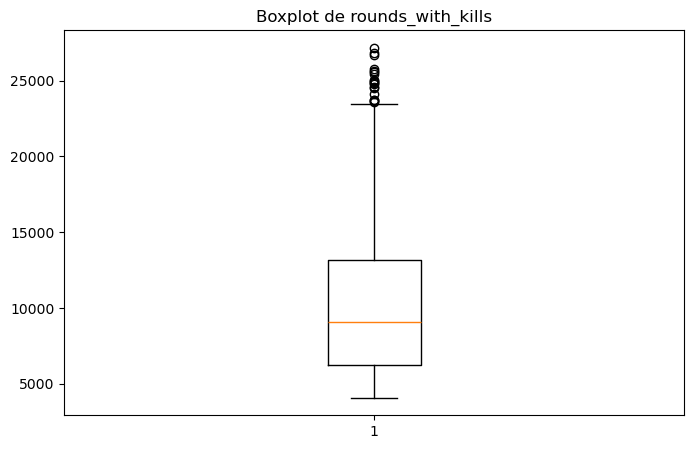

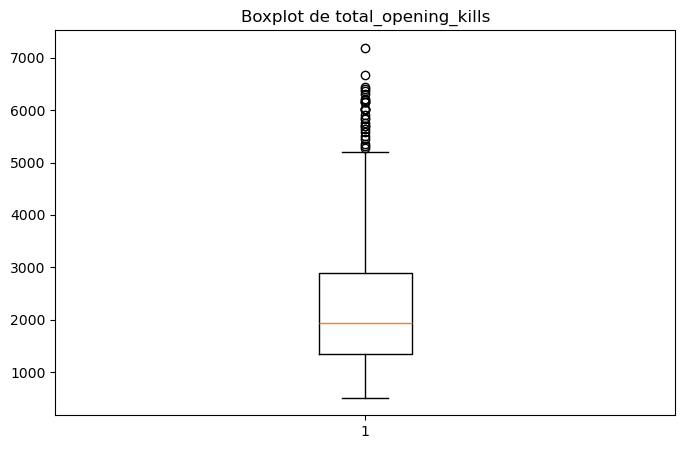

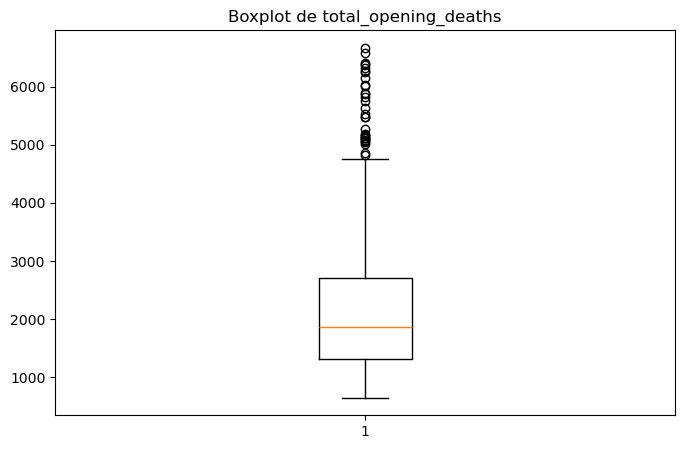

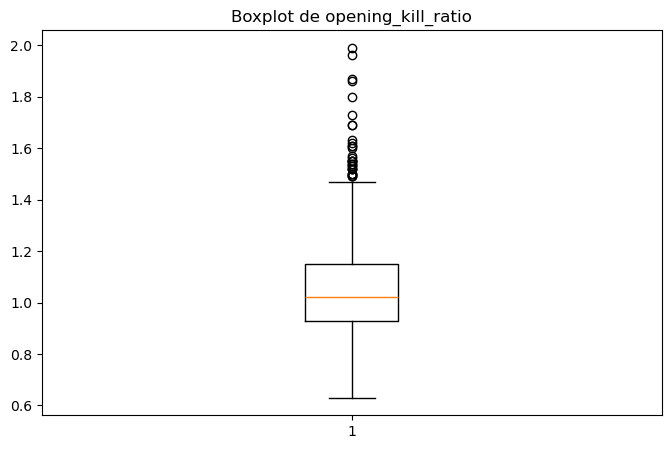

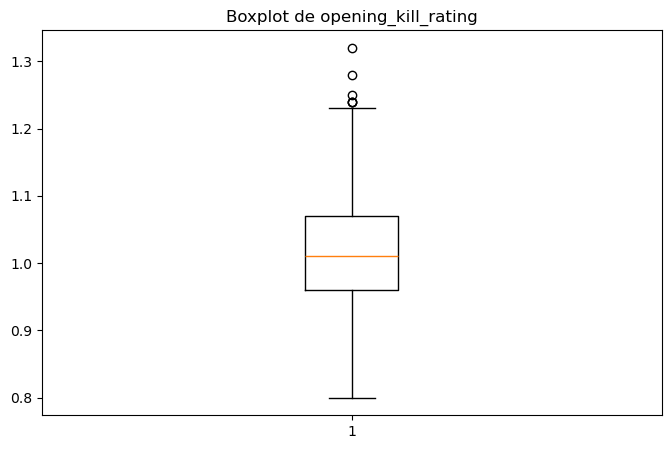

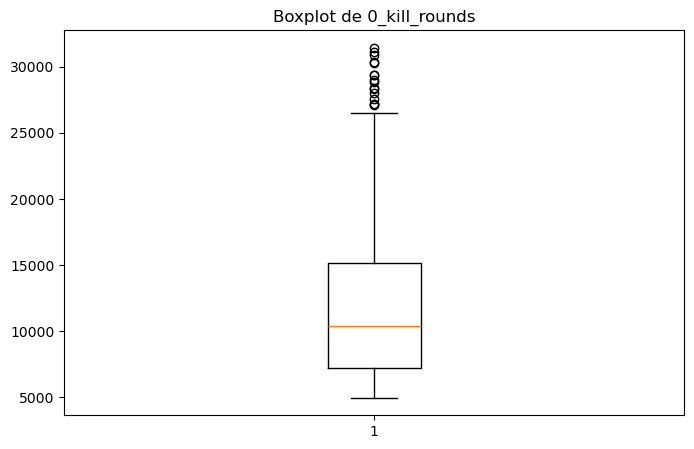

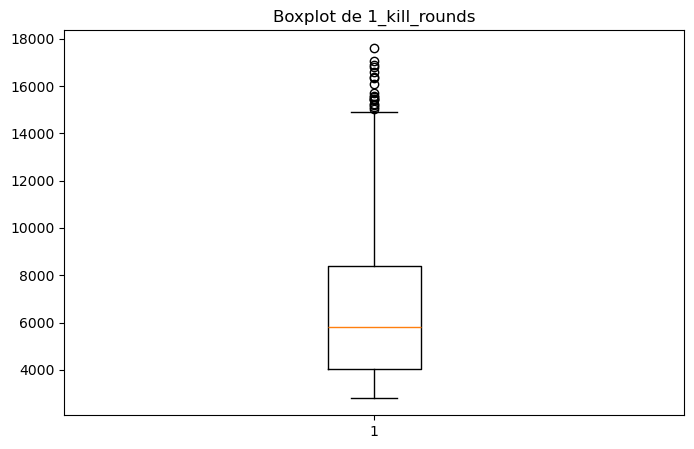

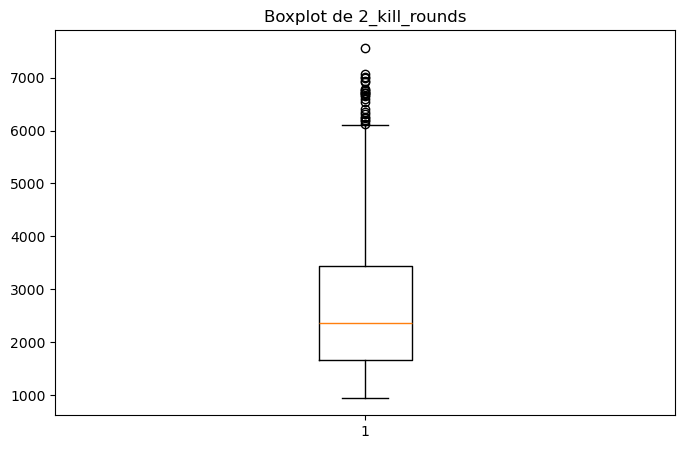

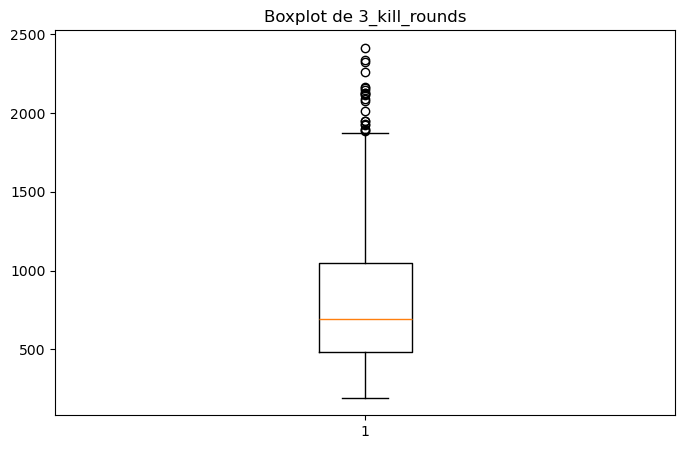

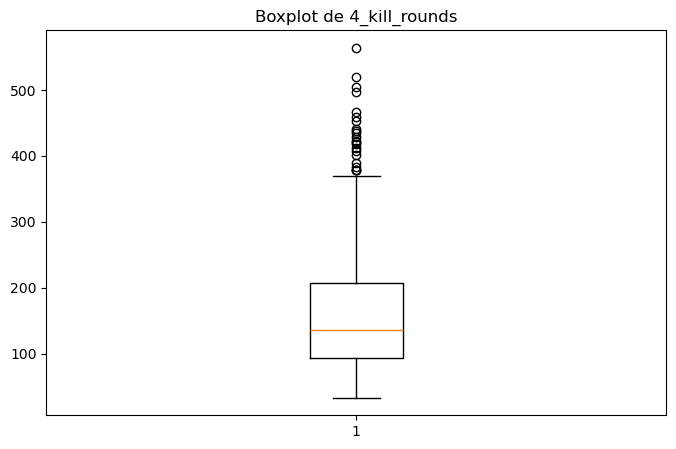

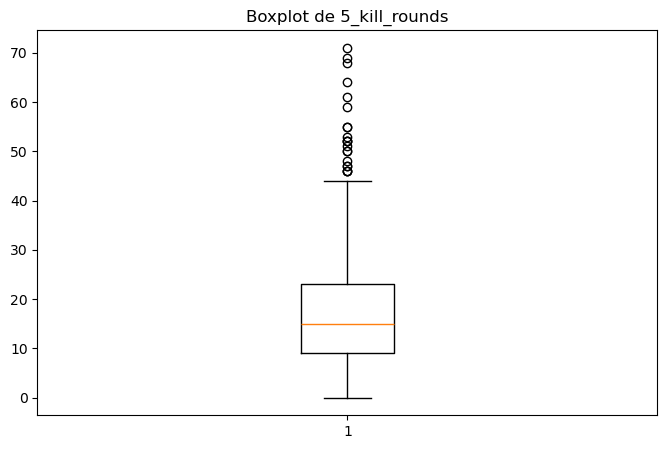

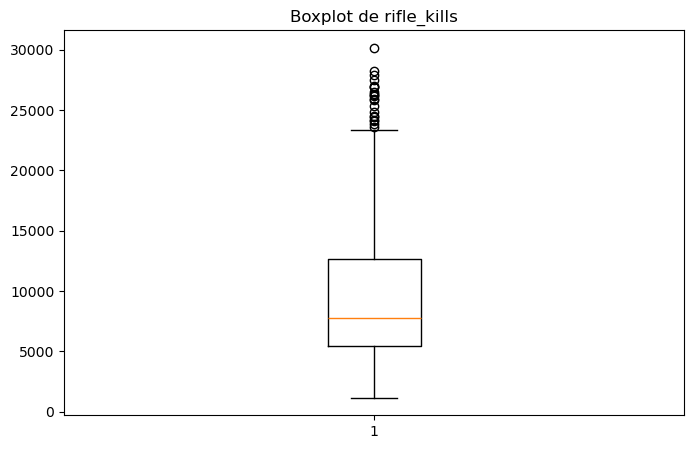

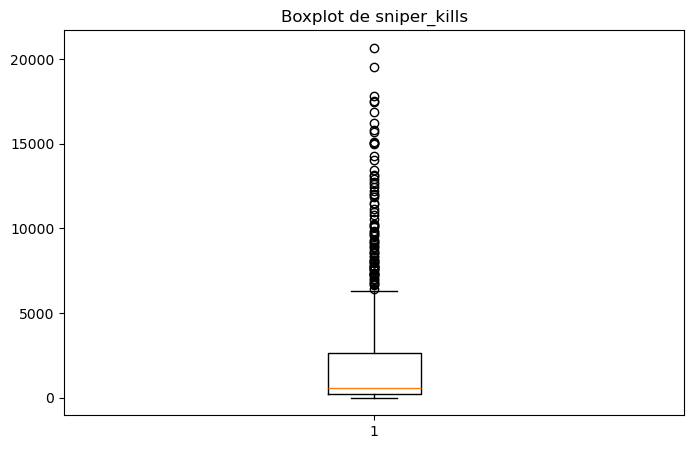

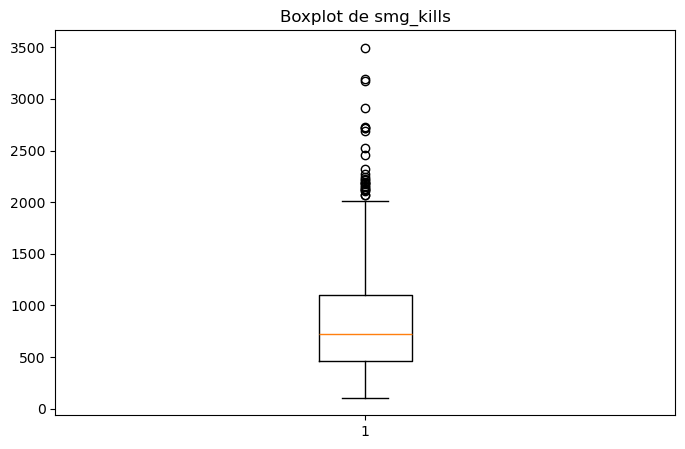

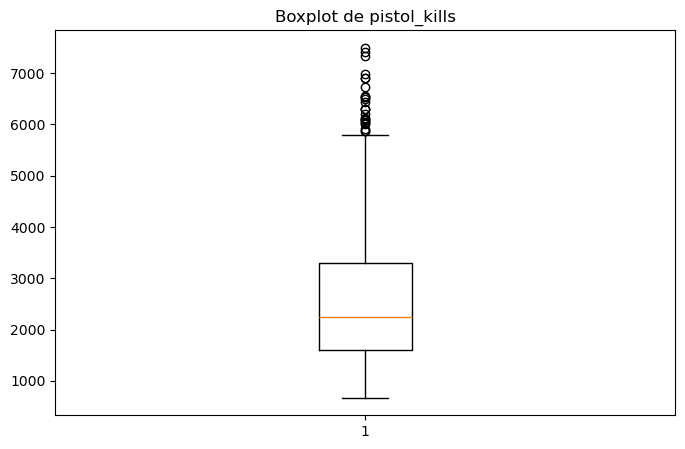

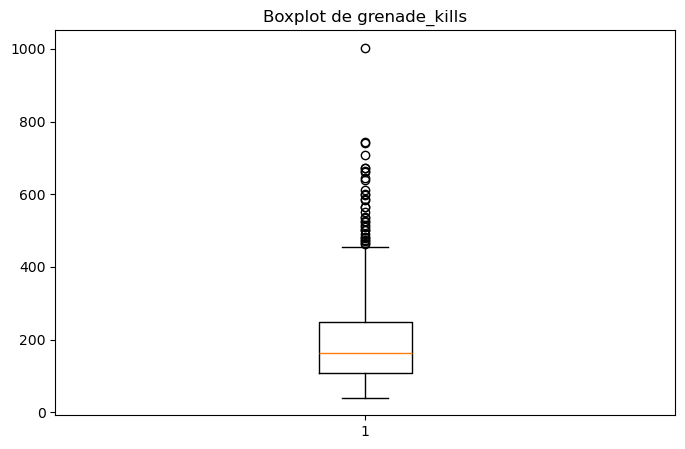

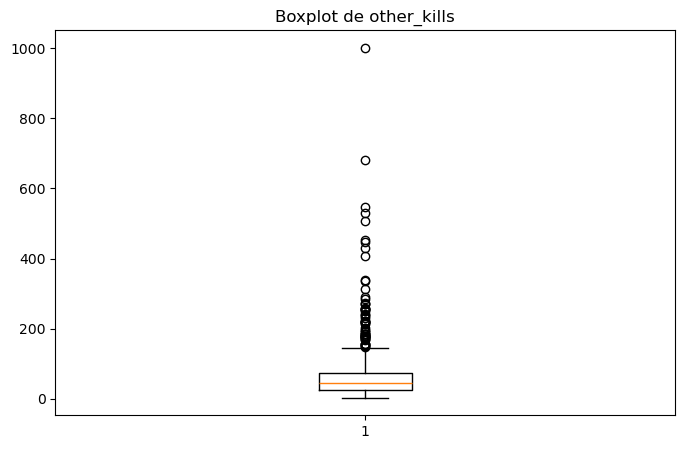

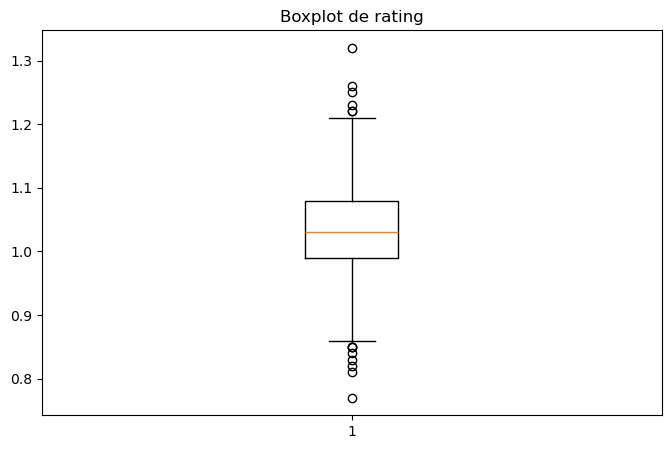

In [7]:
plt.figure(figsize=(15, 10))
for col in df_numeric:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df_numeric[col])
    plt.title('Boxplot de {}'.format(col))
    plt.show()

Tenemos bastantes outliers, pero es normal ya que se trata de las estadísticas de profesionales en su ámbito. Sabiendo que los outliers son jugadores excepcionales, no podemos eliminar los outliers, pero podemos normalizar las variables para obtener una distribución que tienda más a una normal.


c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

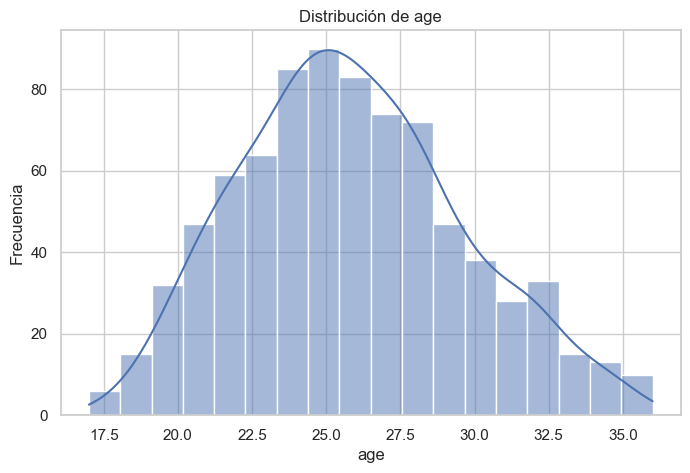

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


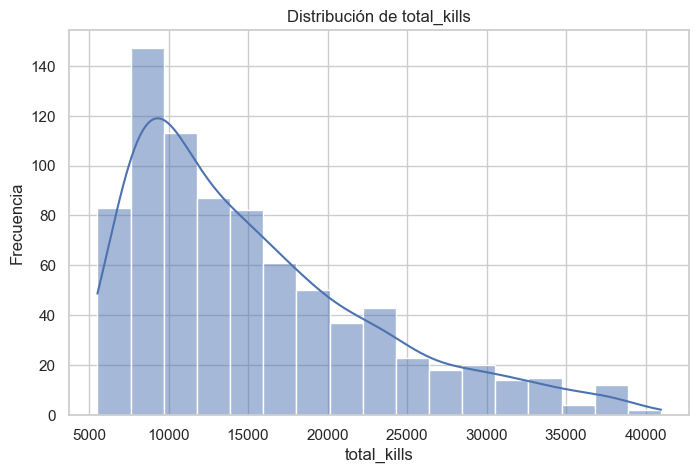

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


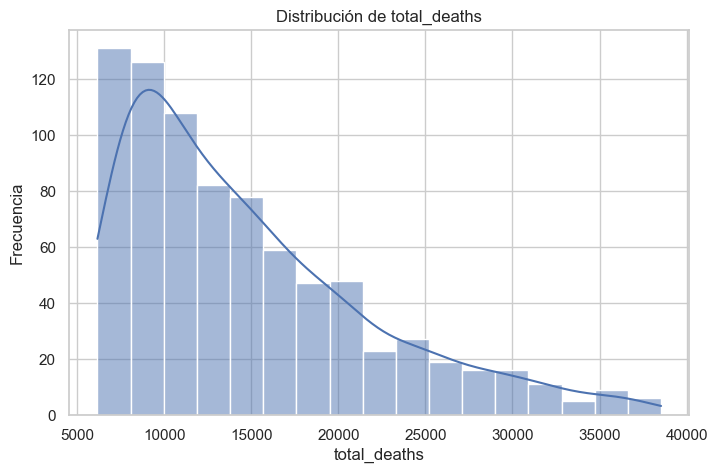

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


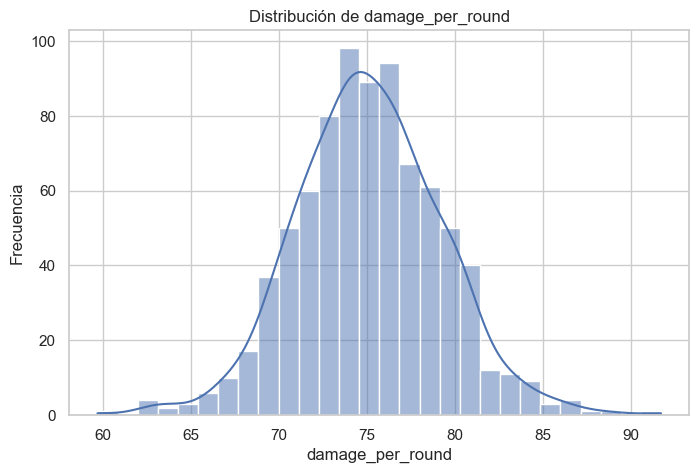

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


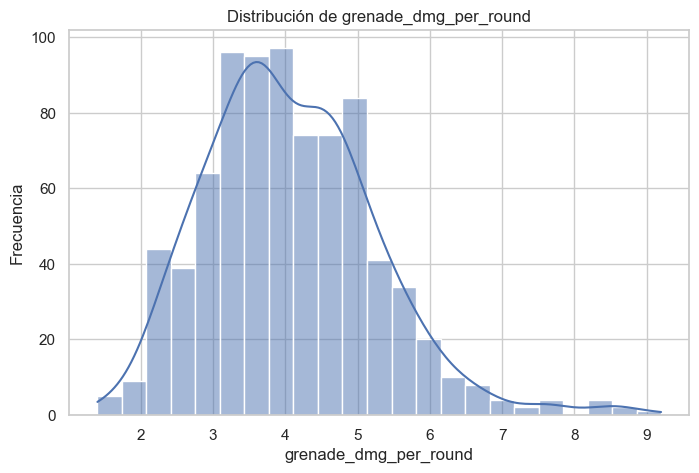

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


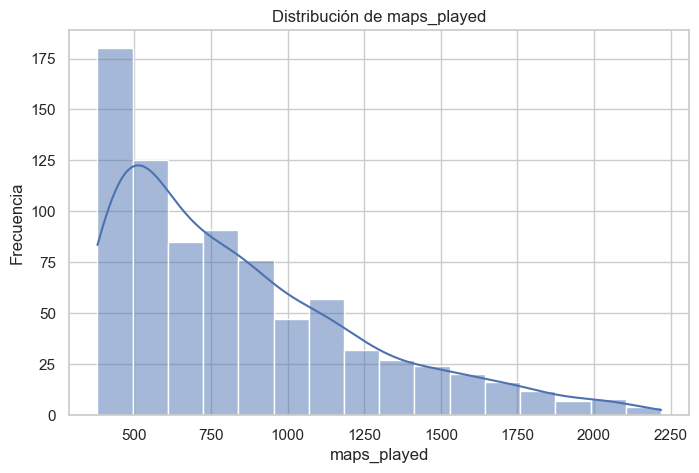

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


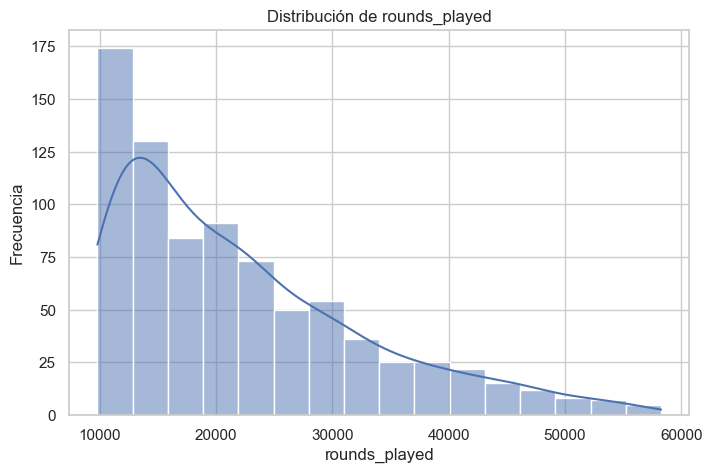

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


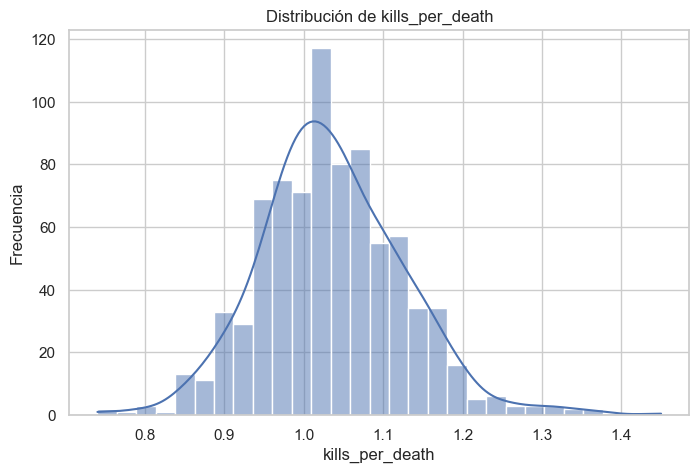

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


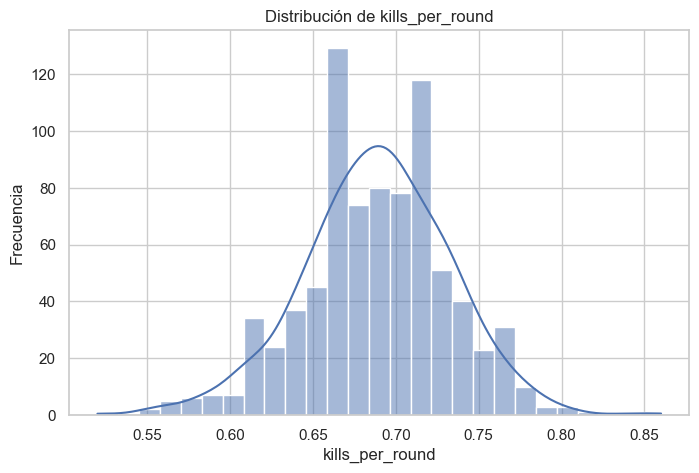

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


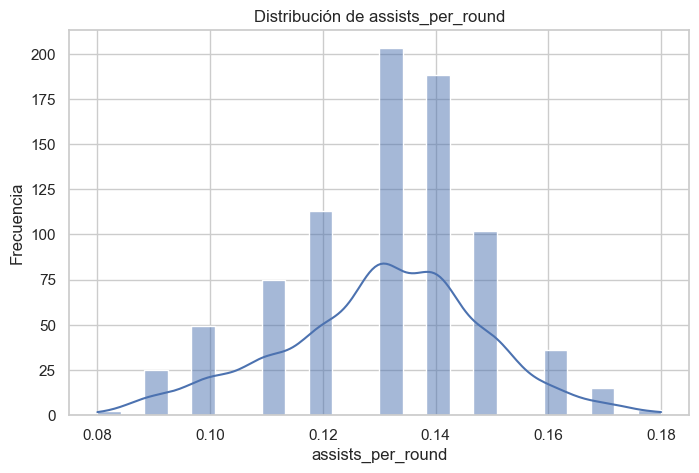

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


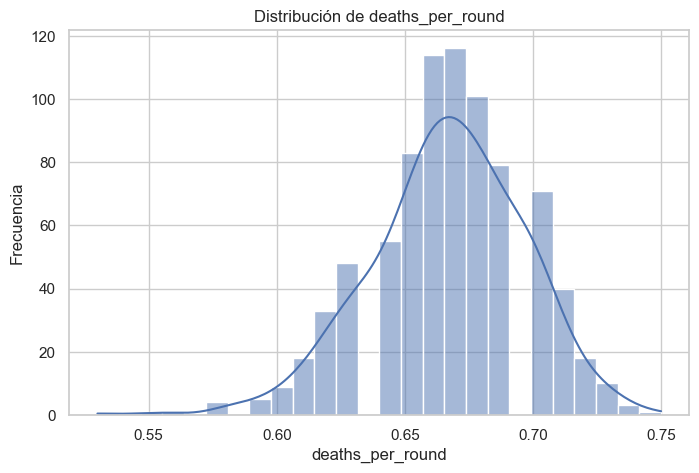

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


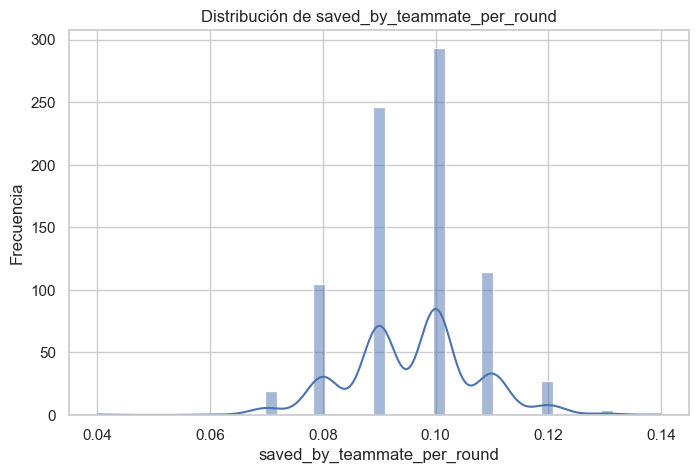

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


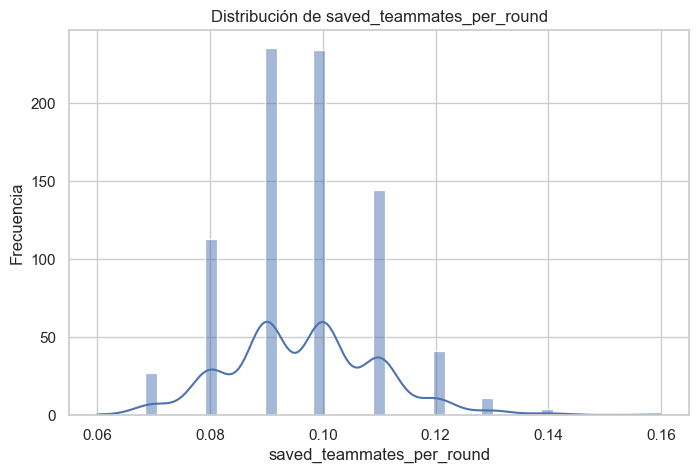

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


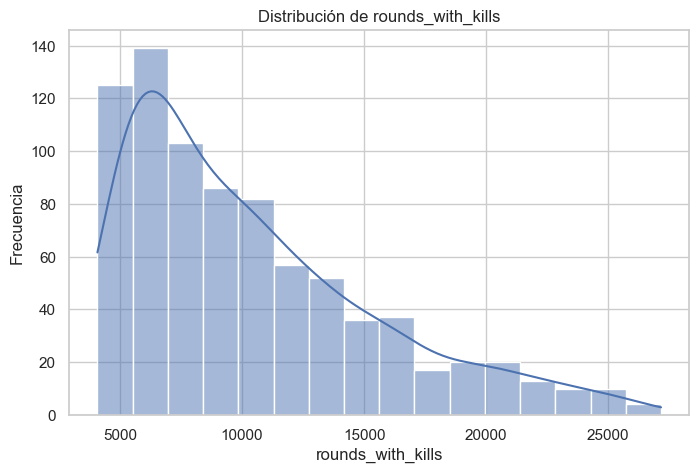

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


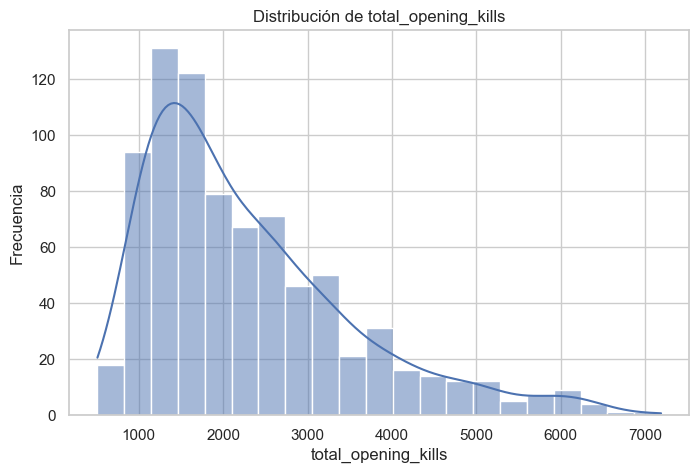

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


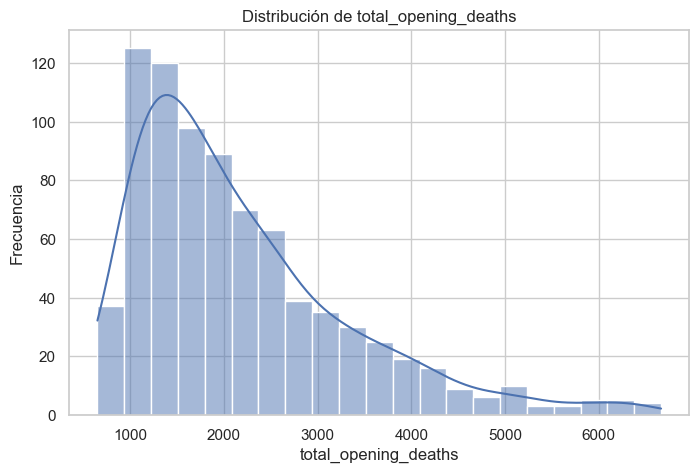

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


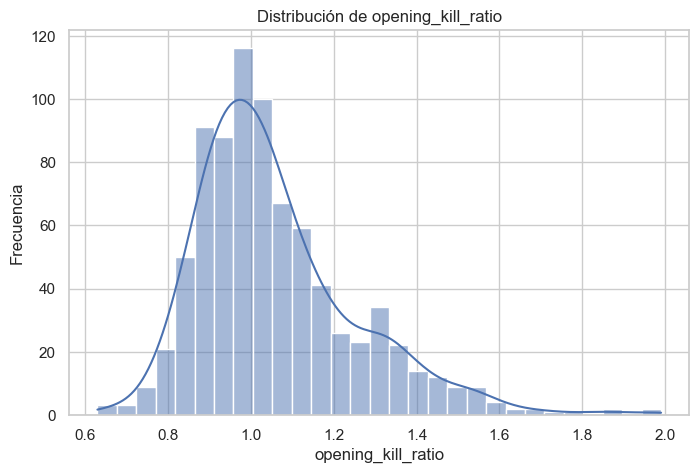

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


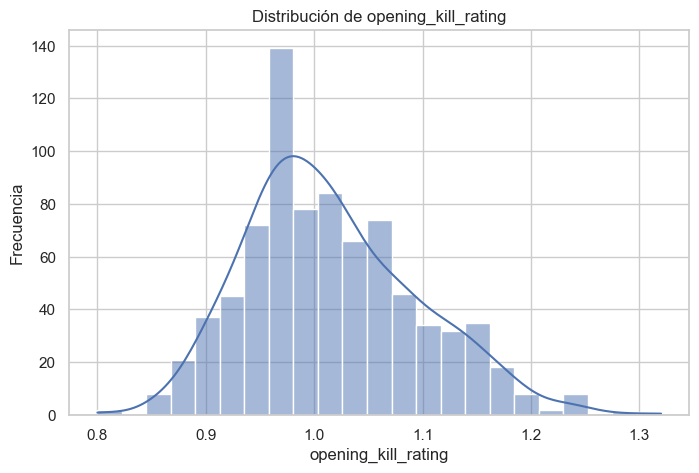

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


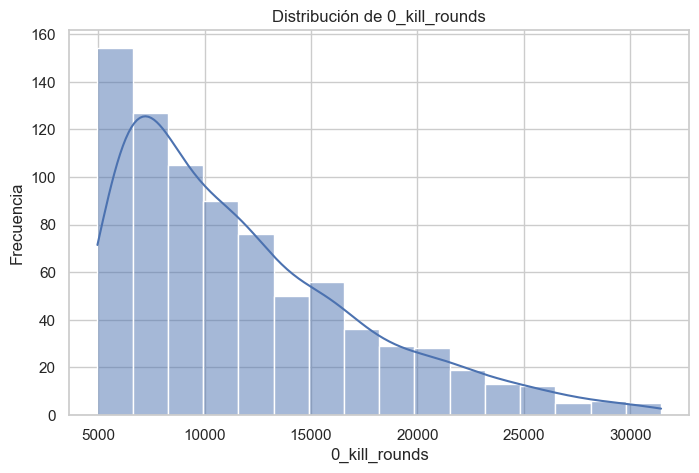

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


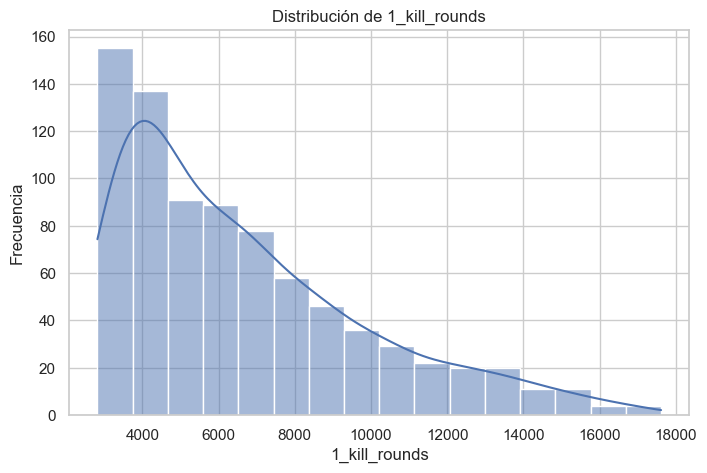

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


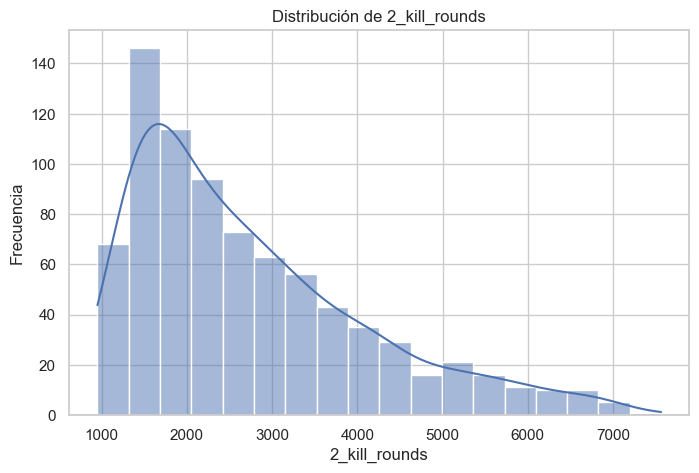

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


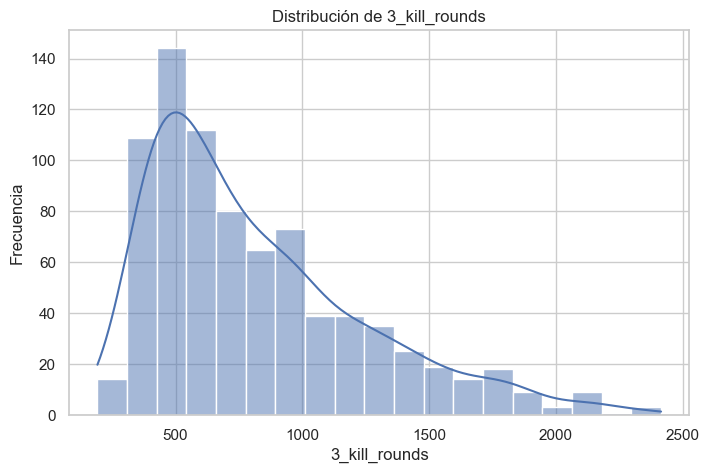

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


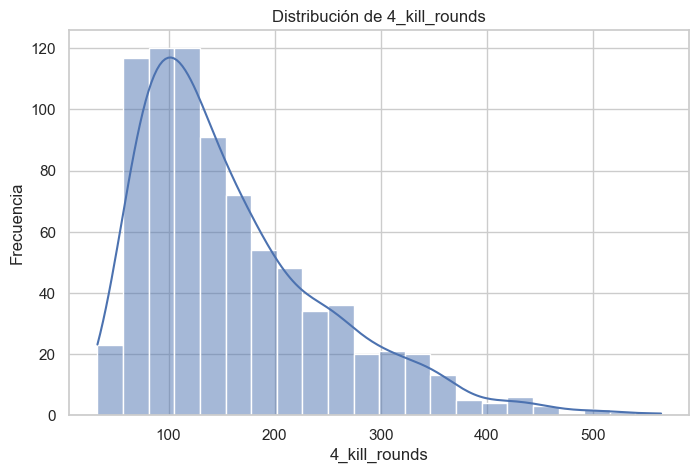

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


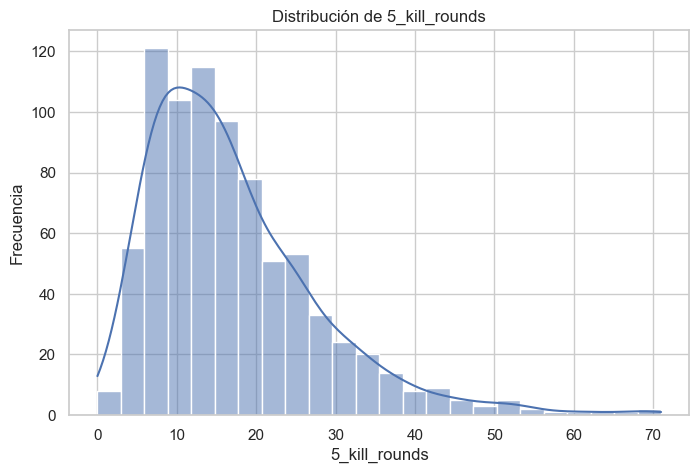

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


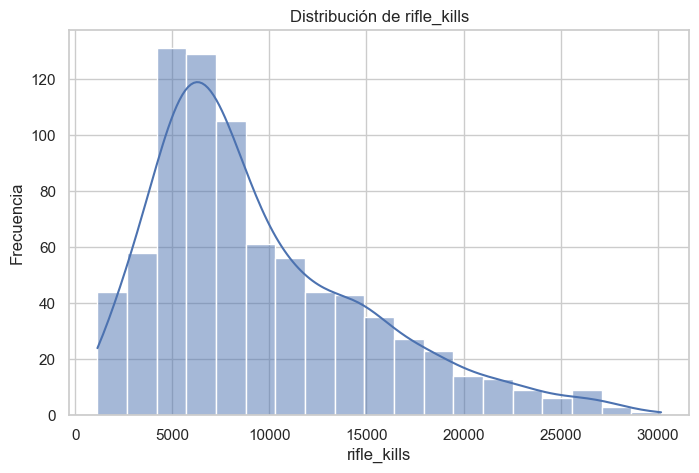

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


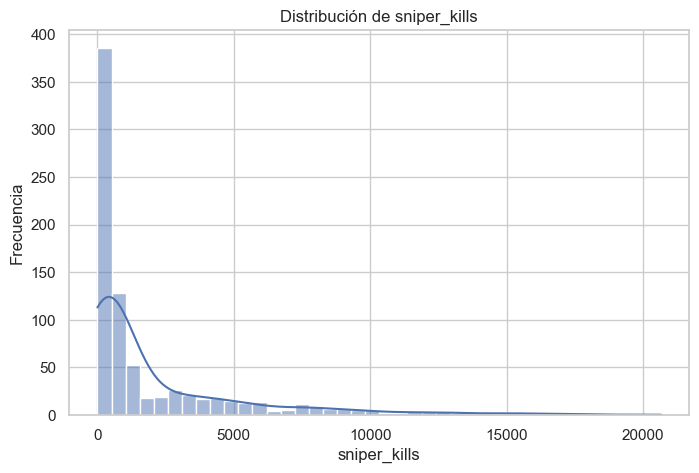

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


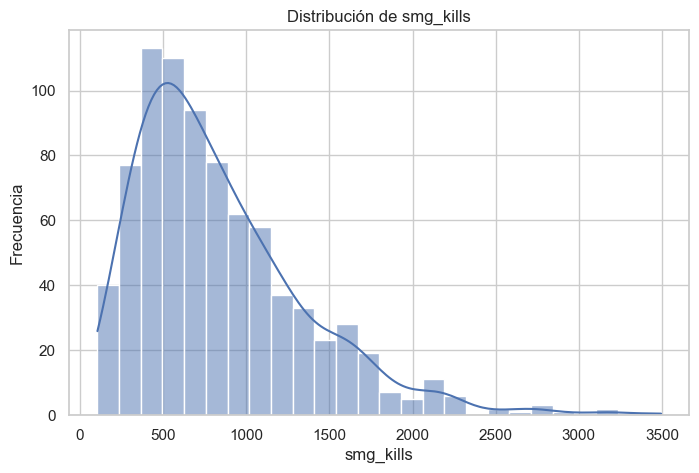

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


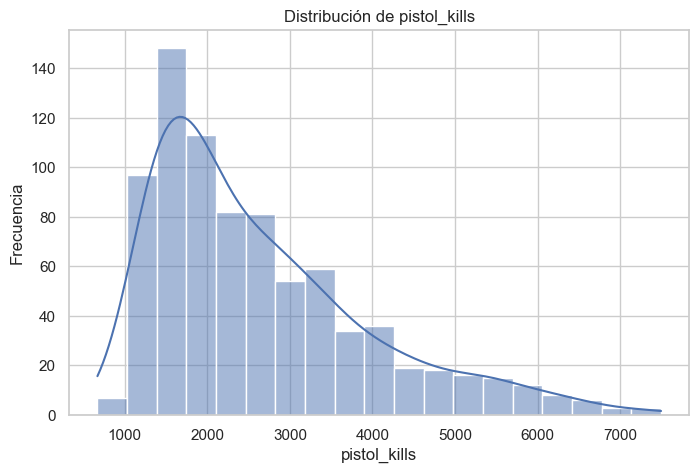

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


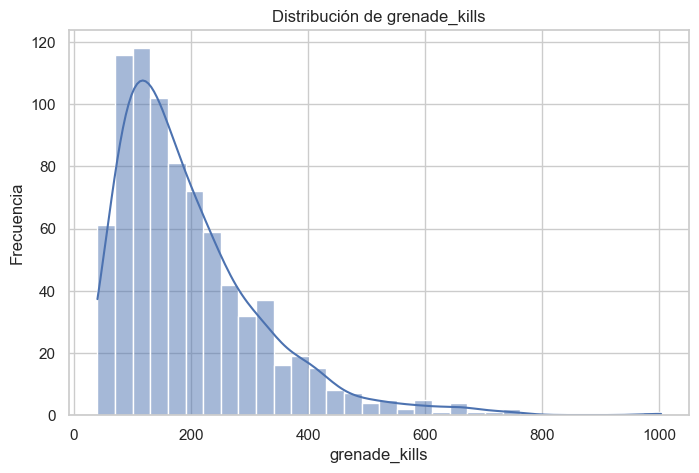

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


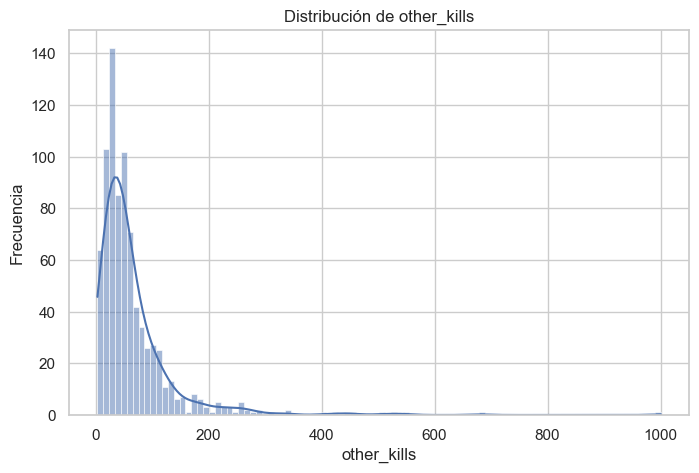

c:\Users\migue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


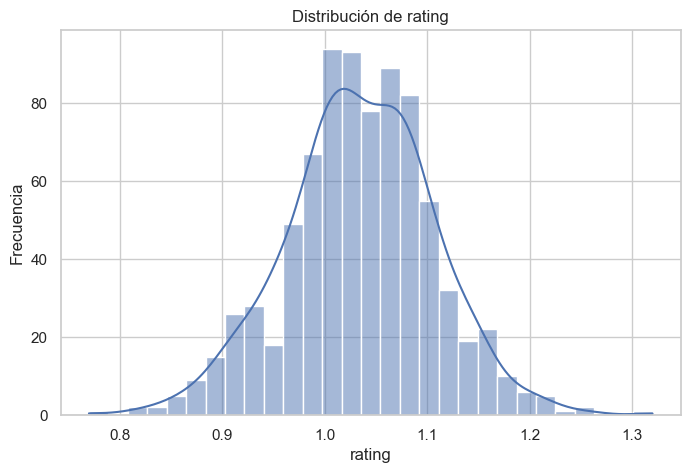

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for col in df_numeric:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numeric[col], kde=True)
    plt.title('Distribución de {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

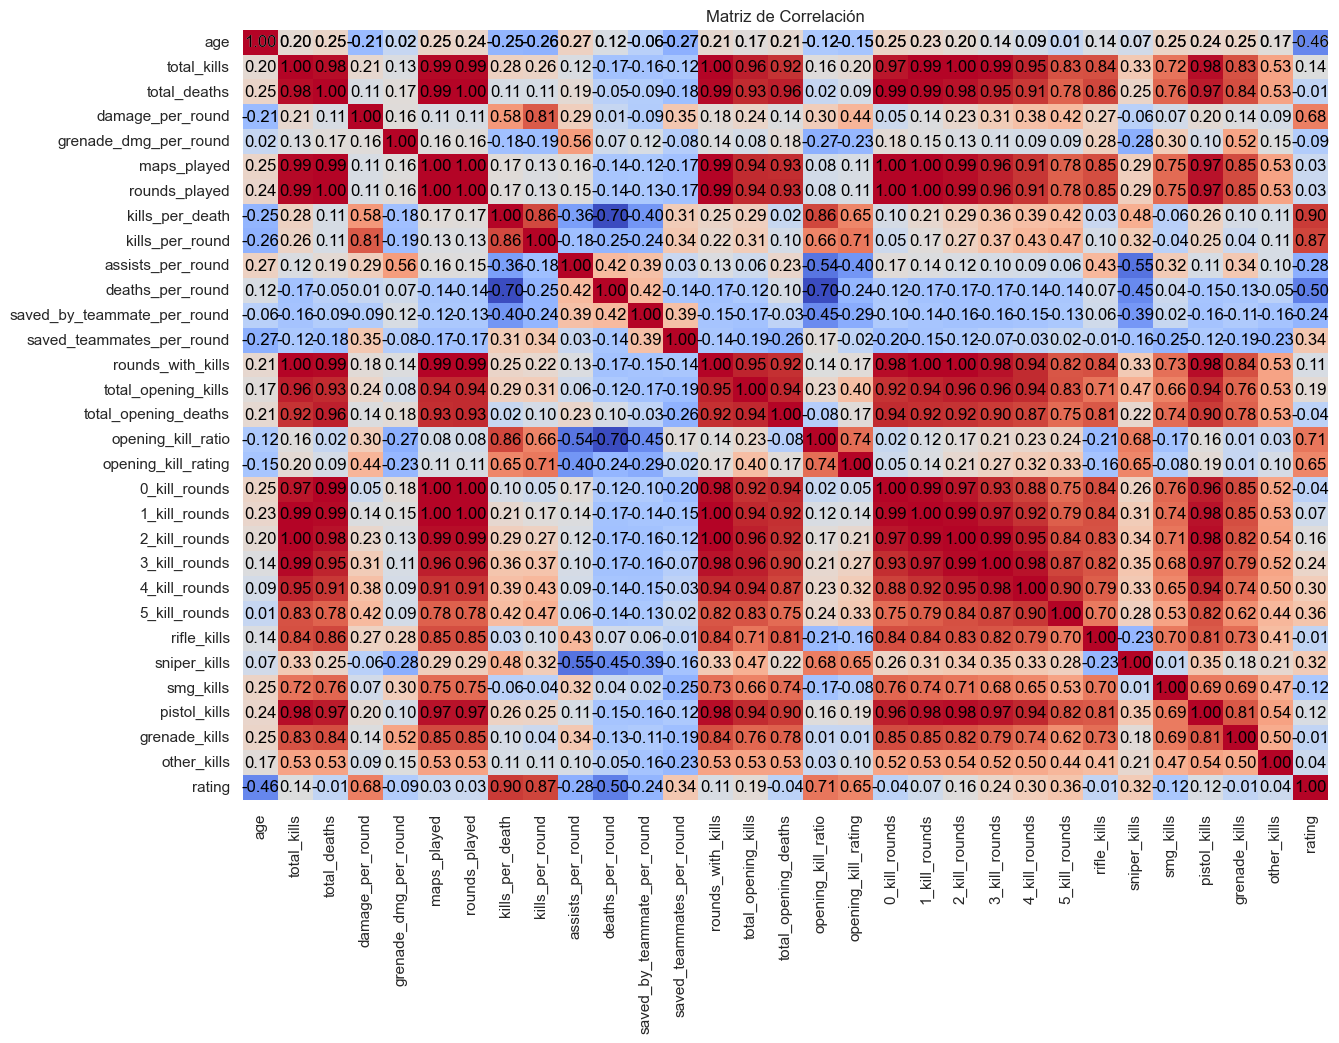

In [9]:
def verificar_multicolinealidad(dataframe):
    correlacion = dataframe.corr()

    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    for i in range(len(correlacion)):
        for j in range(len(correlacion.columns)):
            plt.text(j + 0.5, i + 0.5, "{:.2f}".format(correlacion.iloc[i, j]),
                     ha="center", va="center", color="black")
    plt.title('Matriz de Correlación')
    plt.show()


verificar_multicolinealidad(df_numeric)

In [10]:
df_numeric.dropna(inplace=True)
y = df_numeric["total_kills"]
x = df_numeric["total_deaths"]

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary()) 

                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.186e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:55:47   Log-Likelihood:                -7047.5
No. Observations:                 811   AIC:                         1.410e+04
Df Residuals:                     809   BIC:                         1.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -211.6112    116.610     -1.815   

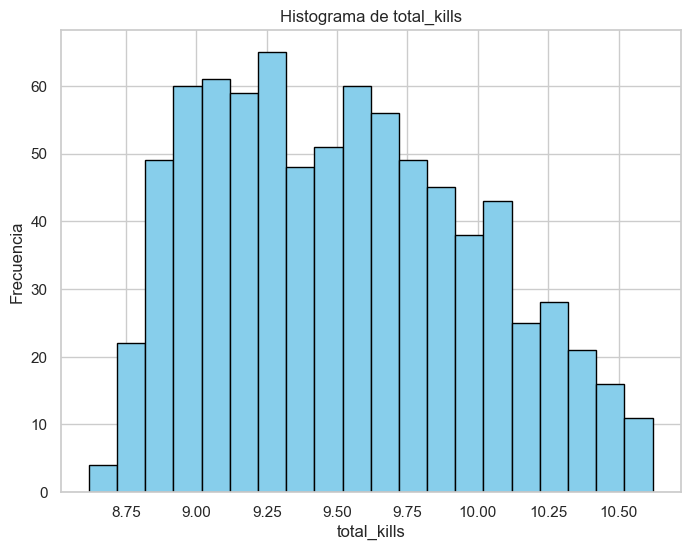

In [11]:
def apply_log(df, column):
    df[column] = np.log(df[column] + 1) 
    return df


def visualizar_histogramas(dataframe, column, bins=20):

    plt.figure(figsize=(8, 6))
    plt.hist(dataframe[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()





total_kills_log = apply_log(df_numeric, ["total_kills"])
visualizar_histogramas(df_numeric, 'total_kills')

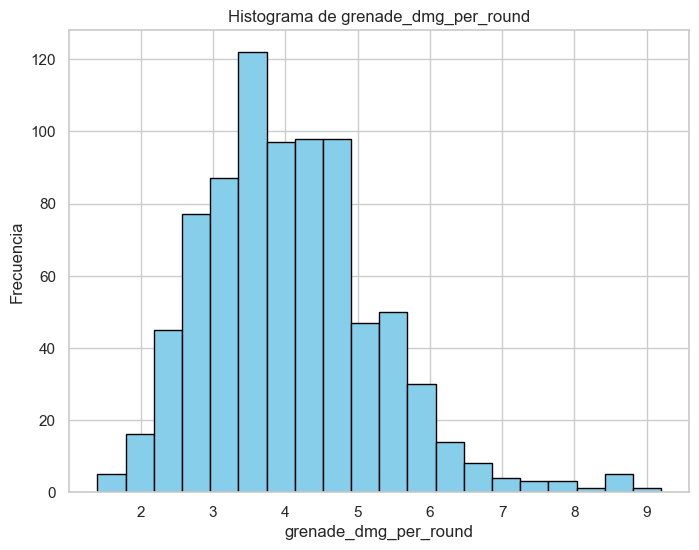

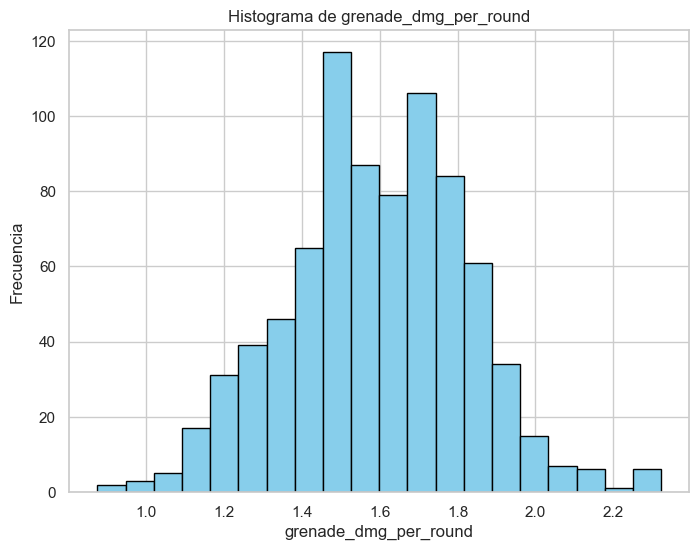

In [12]:
visualizar_histogramas(df_numeric, 'grenade_dmg_per_round')
total_deaths_log = apply_log(df_numeric, ["grenade_dmg_per_round"])
visualizar_histogramas(df_numeric, 'grenade_dmg_per_round')


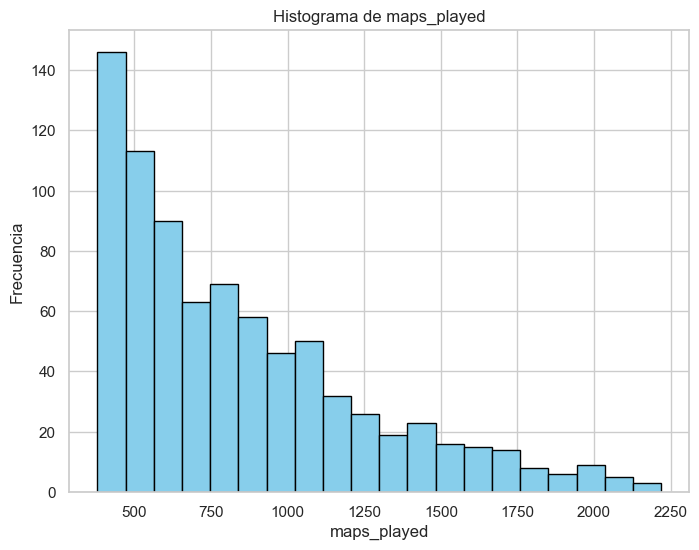

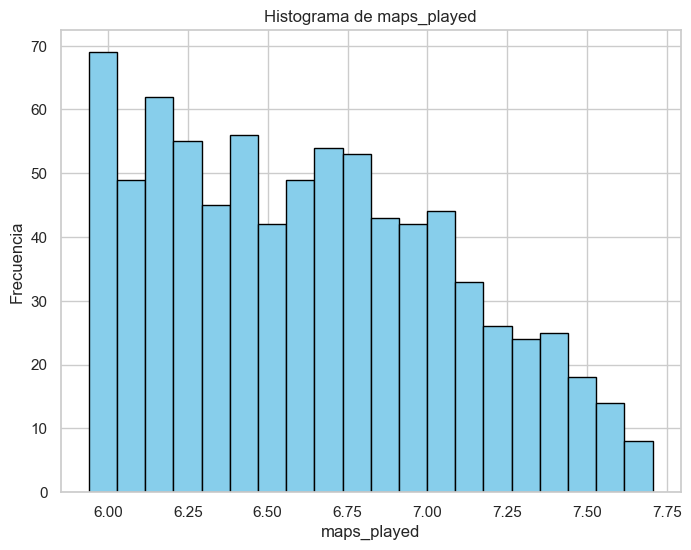

In [13]:
visualizar_histogramas(df_numeric, 'maps_played')
total_deaths_log = apply_log(df_numeric, ["maps_played"])
visualizar_histogramas(df_numeric, 'maps_played')

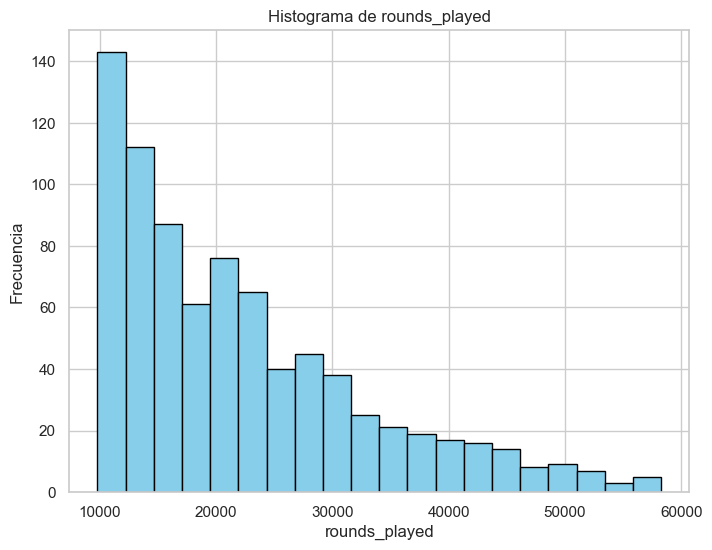

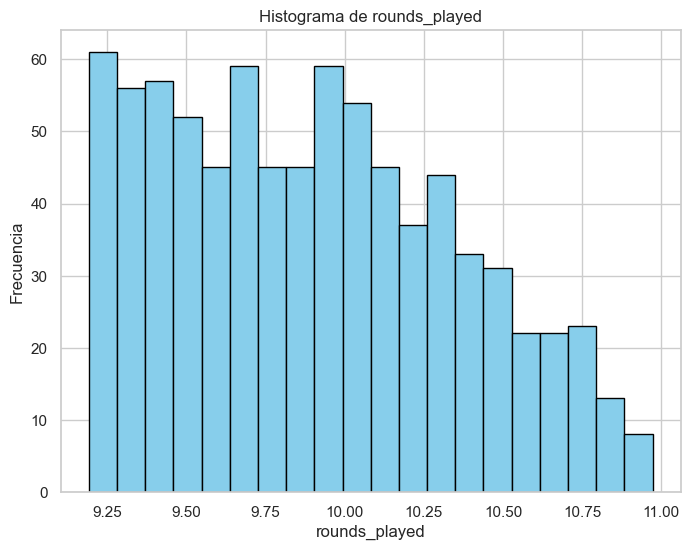

In [14]:
visualizar_histogramas(df_numeric, 'rounds_played')
total_deaths_log = apply_log(df_numeric, ["rounds_played"])
visualizar_histogramas(df_numeric, 'rounds_played')

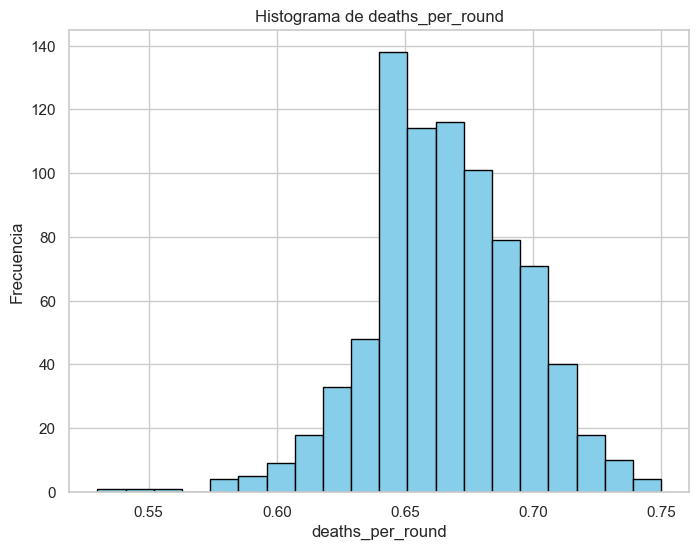

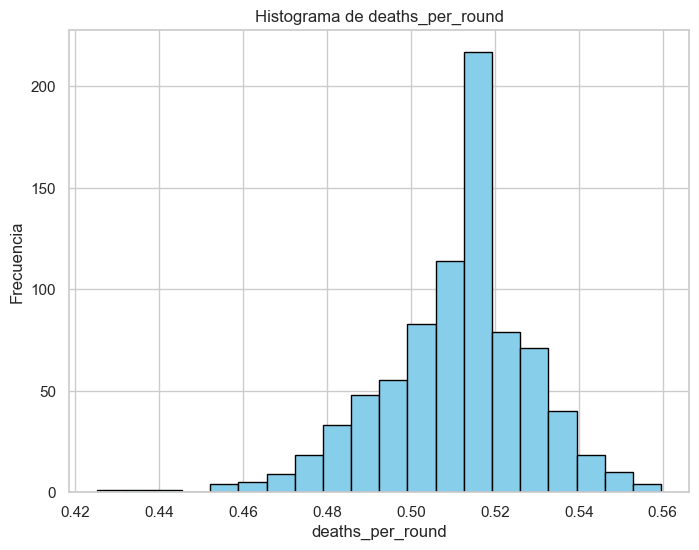

In [15]:
visualizar_histogramas(df_numeric, 'deaths_per_round')
total_deaths_log = apply_log(df_numeric, ["deaths_per_round"])
visualizar_histogramas(df_numeric, 'deaths_per_round')

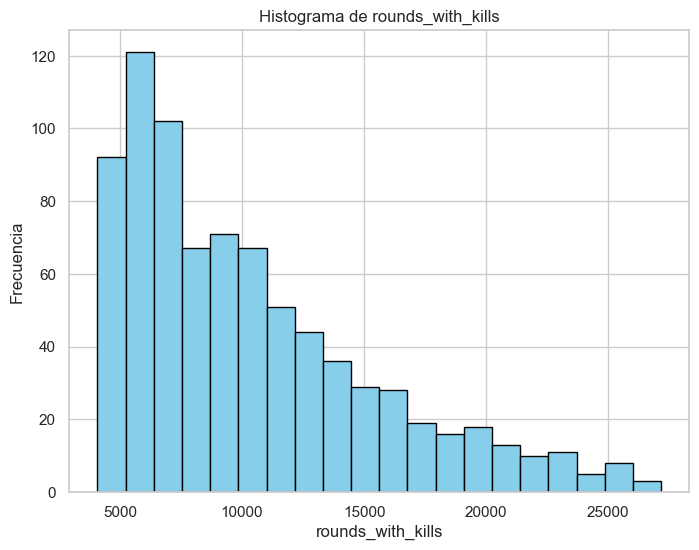

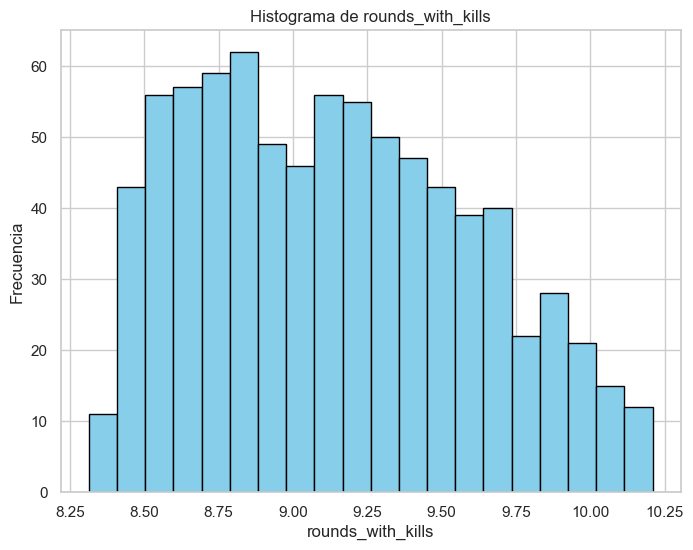

In [16]:
visualizar_histogramas(df_numeric, 'rounds_with_kills')
total_deaths_log = apply_log(df_numeric, ["rounds_with_kills"])
visualizar_histogramas(df_numeric, 'rounds_with_kills')

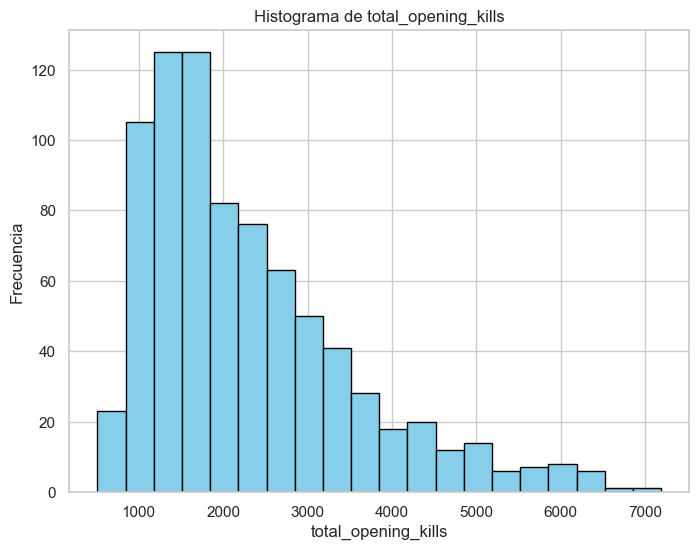

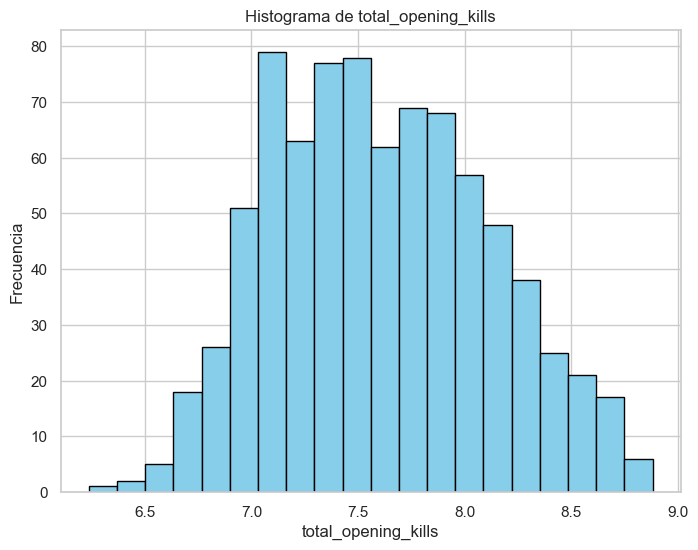

In [17]:
visualizar_histogramas(df_numeric, 'total_opening_kills')
total_deaths_log = apply_log(df_numeric, ["total_opening_kills"])
visualizar_histogramas(df_numeric, 'total_opening_kills')

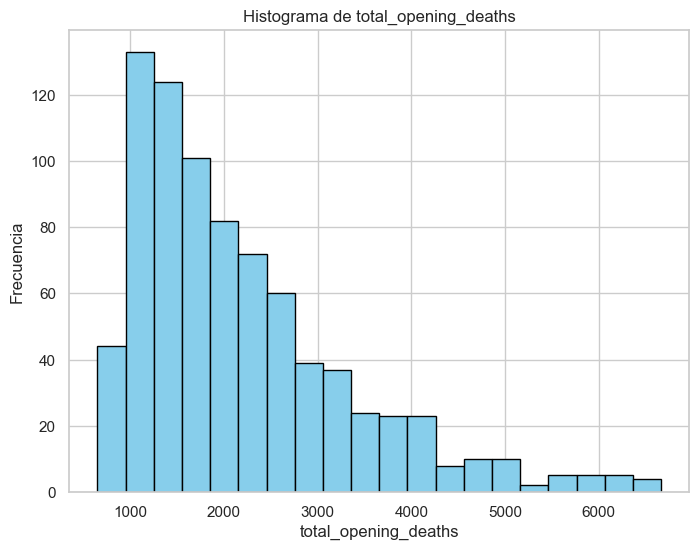

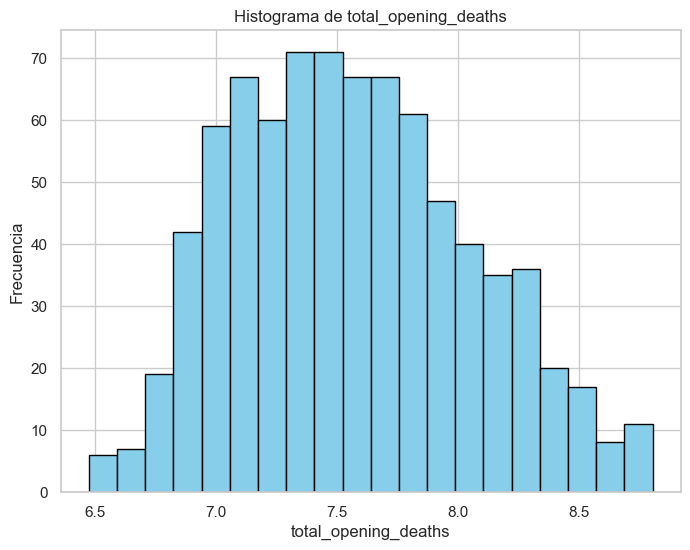

In [18]:
visualizar_histogramas(df_numeric, 'total_opening_deaths')
total_deaths_log = apply_log(df_numeric, ["total_opening_deaths"])
visualizar_histogramas(df_numeric, 'total_opening_deaths')

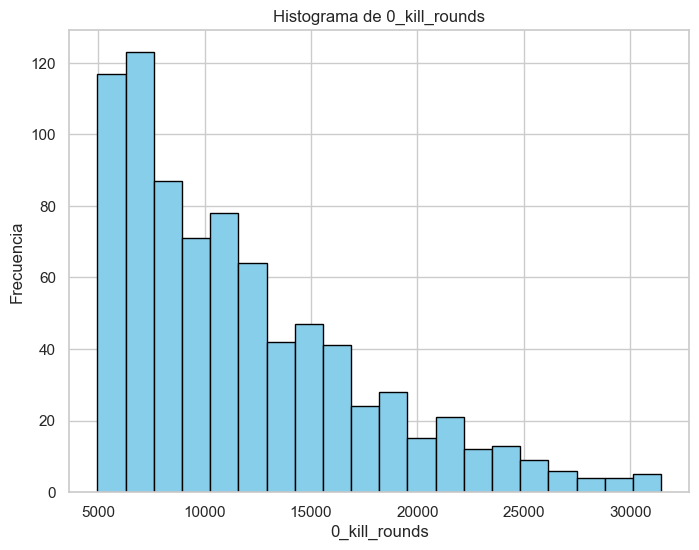

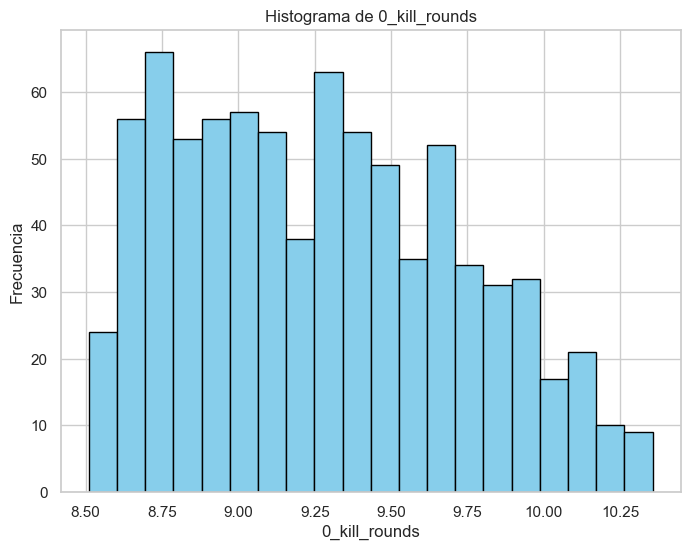

In [19]:
visualizar_histogramas(df_numeric, '0_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["0_kill_rounds"])
visualizar_histogramas(df_numeric, '0_kill_rounds')

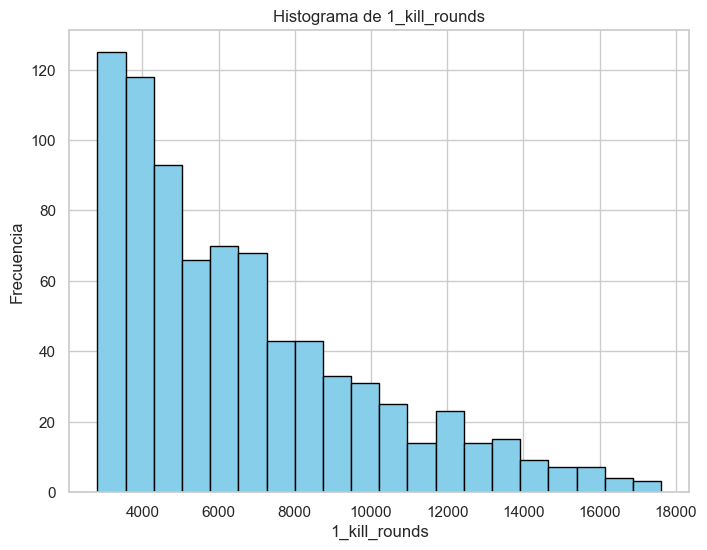

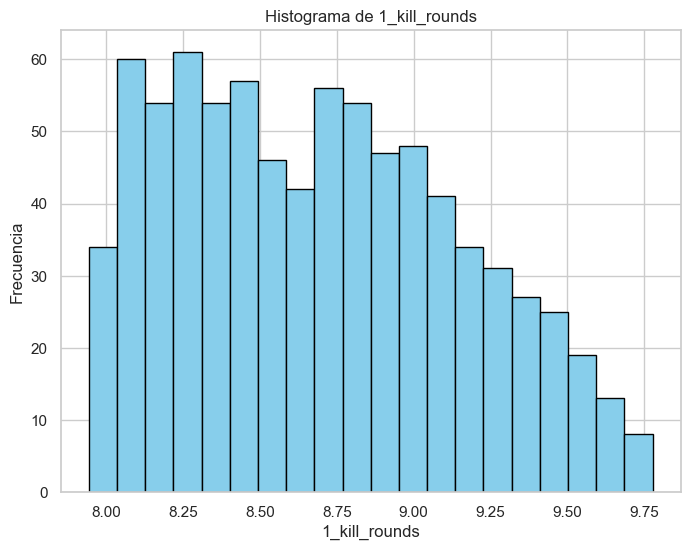

In [20]:
visualizar_histogramas(df_numeric, '1_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["1_kill_rounds"])
visualizar_histogramas(df_numeric, '1_kill_rounds')

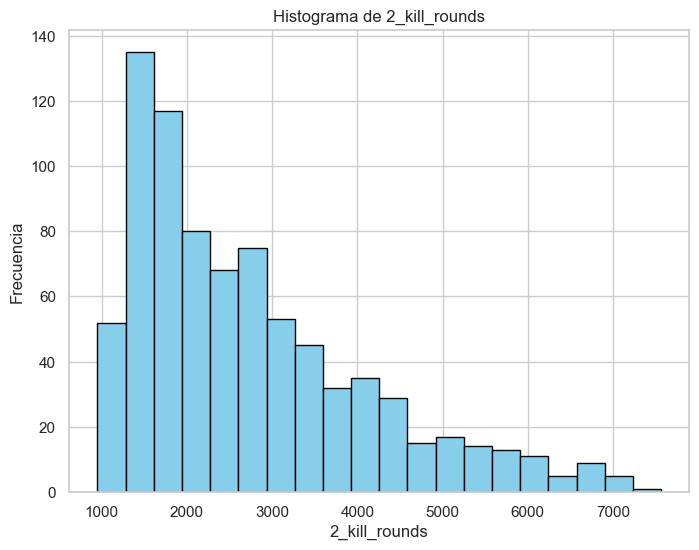

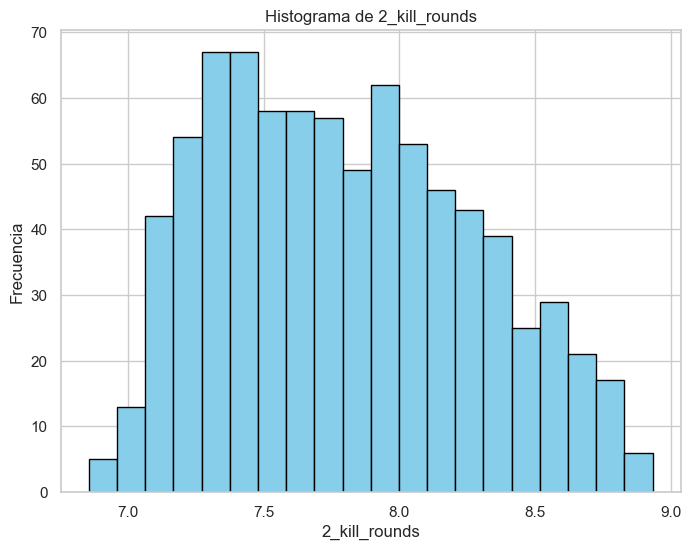

In [21]:
visualizar_histogramas(df_numeric, '2_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["2_kill_rounds"])
visualizar_histogramas(df_numeric, '2_kill_rounds')

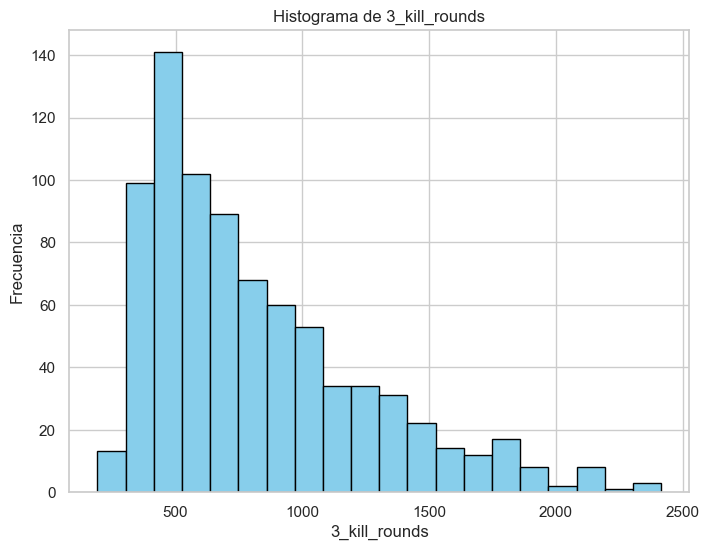

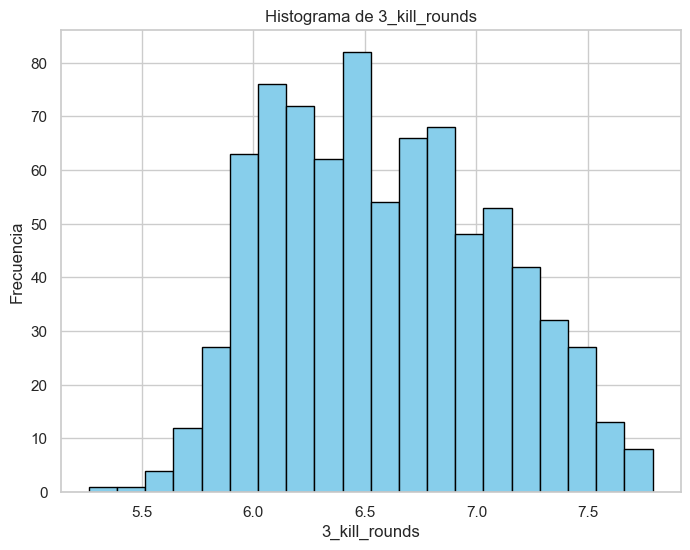

In [22]:
visualizar_histogramas(df_numeric, '3_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["3_kill_rounds"])
visualizar_histogramas(df_numeric, '3_kill_rounds')

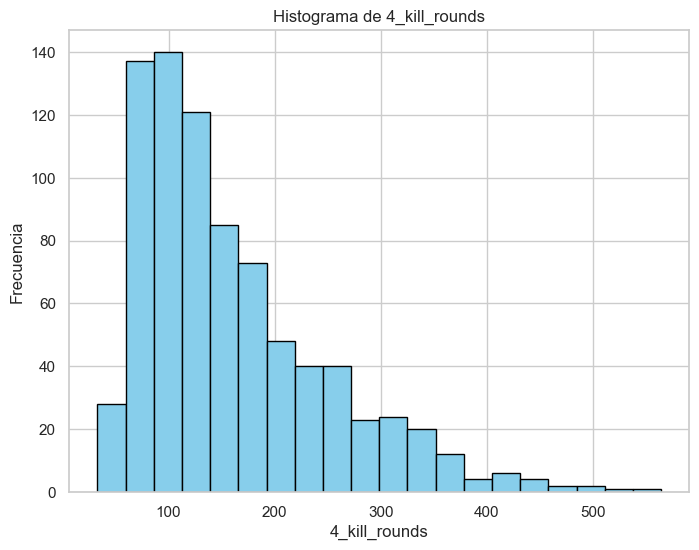

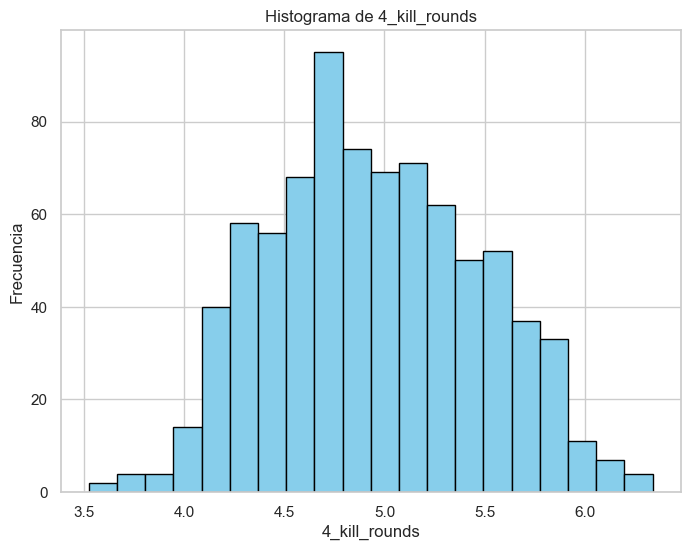

In [23]:
visualizar_histogramas(df_numeric, '4_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["4_kill_rounds"])
visualizar_histogramas(df_numeric, '4_kill_rounds')

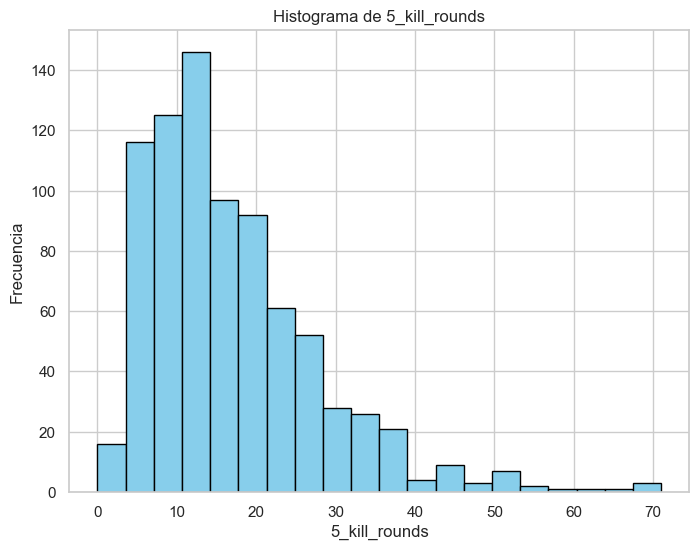

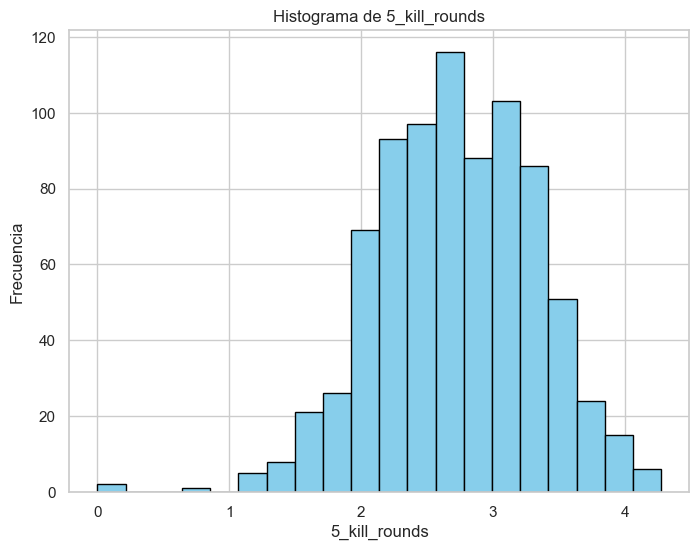

In [24]:
visualizar_histogramas(df_numeric, '5_kill_rounds')
total_deaths_log = apply_log(df_numeric, ["5_kill_rounds"])
visualizar_histogramas(df_numeric, '5_kill_rounds')

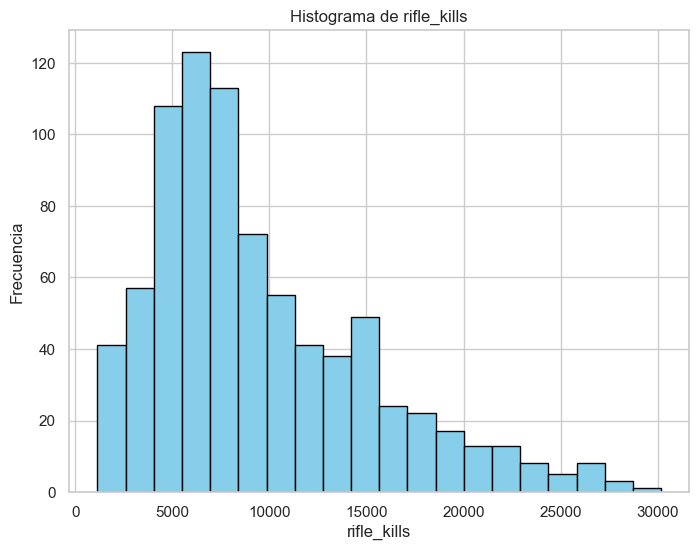

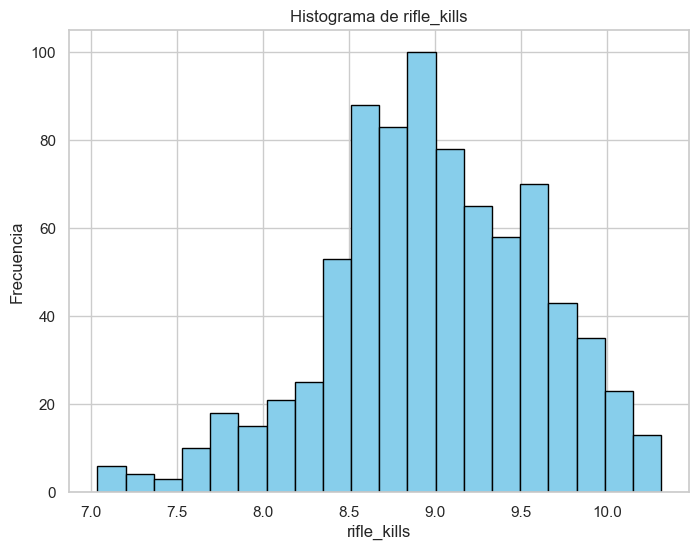

In [25]:
visualizar_histogramas(df_numeric, 'rifle_kills')
total_deaths_log = apply_log(df_numeric, ["rifle_kills"])
visualizar_histogramas(df_numeric, 'rifle_kills')

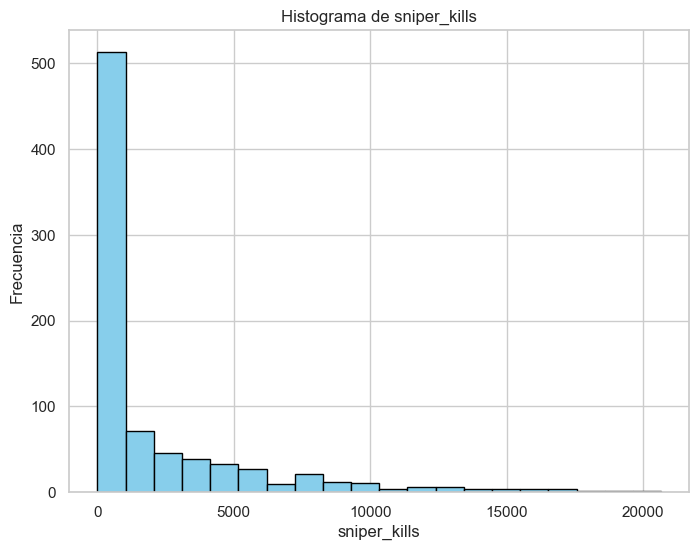

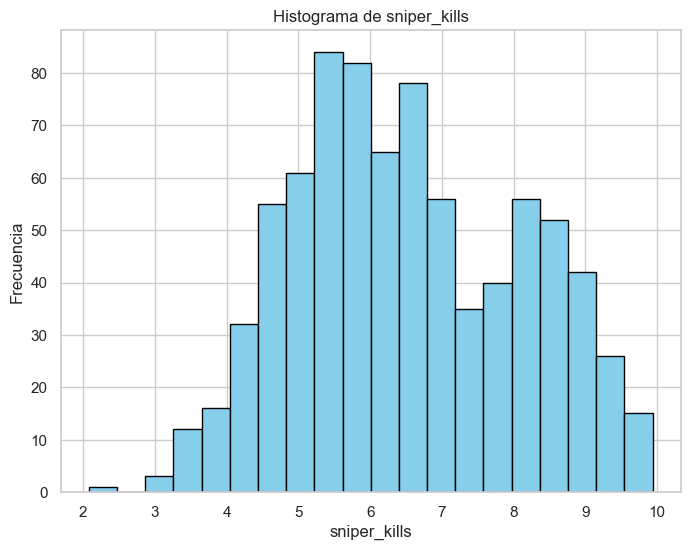

In [26]:
visualizar_histogramas(df_numeric, 'sniper_kills')
total_deaths_log = apply_log(df_numeric, ["sniper_kills"])
visualizar_histogramas(df_numeric, 'sniper_kills')

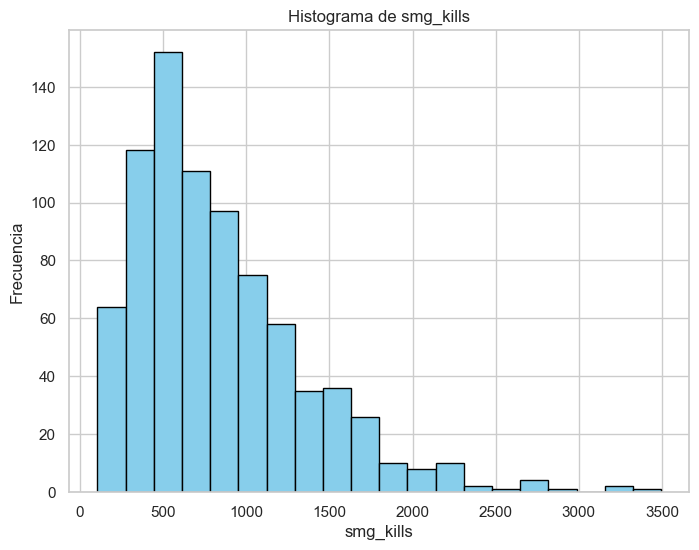

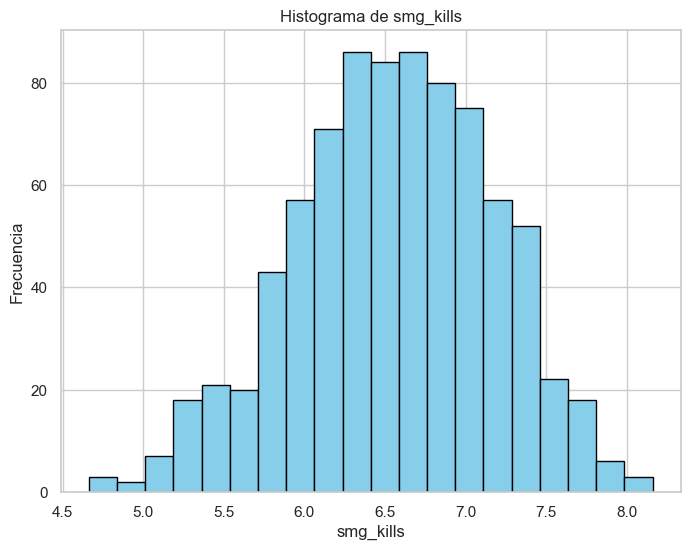

In [27]:
visualizar_histogramas(df_numeric, 'smg_kills')
total_deaths_log = apply_log(df_numeric, ["smg_kills"])
visualizar_histogramas(df_numeric, 'smg_kills')

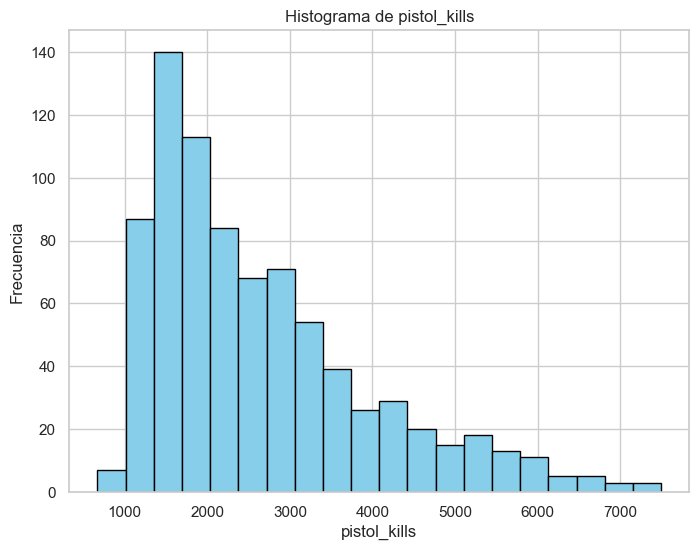

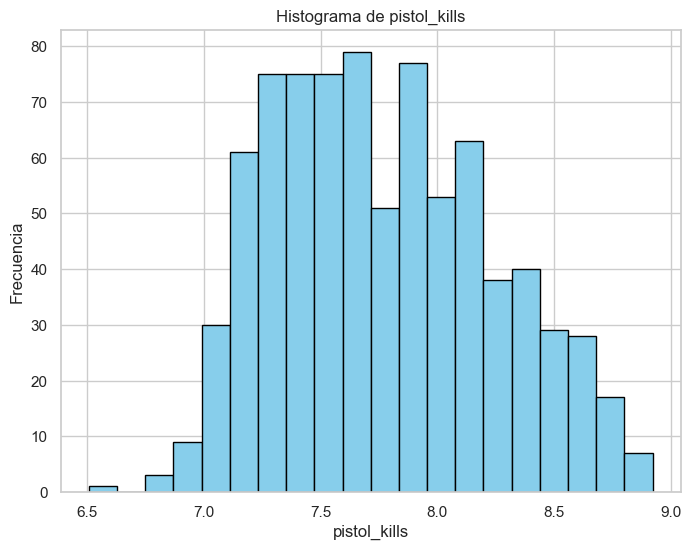

In [28]:
visualizar_histogramas(df_numeric, 'pistol_kills')
total_deaths_log = apply_log(df_numeric, ["pistol_kills"])
visualizar_histogramas(df_numeric, 'pistol_kills')

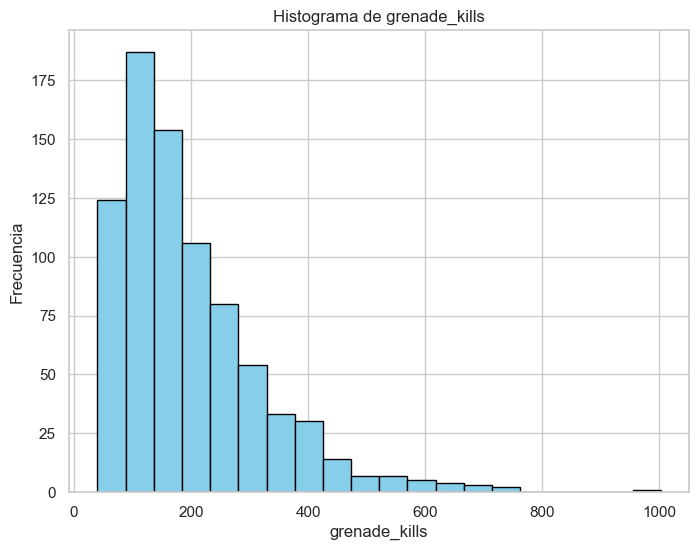

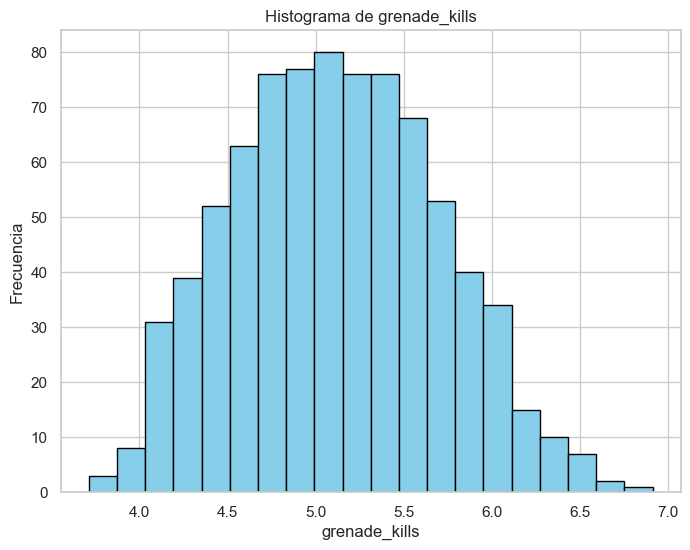

In [29]:
visualizar_histogramas(df_numeric, 'grenade_kills')
total_deaths_log = apply_log(df_numeric, ["grenade_kills"])
visualizar_histogramas(df_numeric, 'grenade_kills')

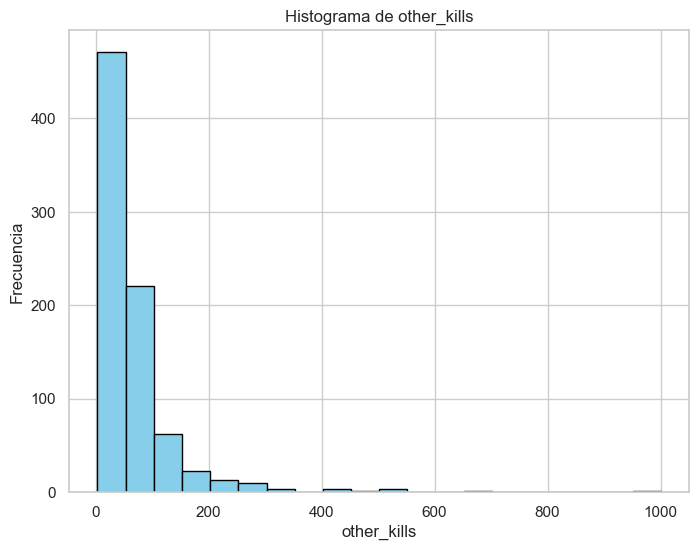

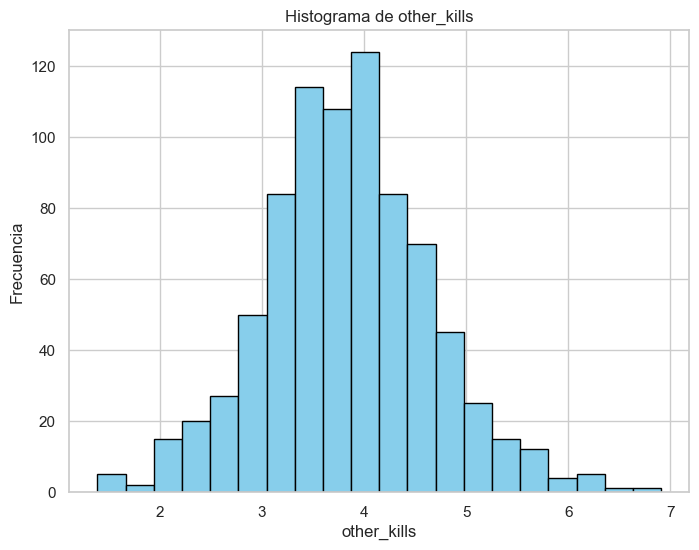

In [30]:
visualizar_histogramas(df_numeric, 'other_kills')
total_deaths_log = apply_log(df_numeric, ["other_kills"])
visualizar_histogramas(df_numeric, 'other_kills')

In [31]:
df_prueba = df_numeric.copy()


In [32]:
y = df_prueba['total_kills']
X = df_prueba.drop(columns='total_kills') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (567, 30) (567,)
Dimensiones del conjunto de prueba: (244, 30) (244,)


In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R cuadrado del conjunto de entrenamiento:", r2_train)
print("R cuadrado del conjunto de prueba:", r2_test)

mse_test = mean_squared_error(y_test, y_test_pred)

print("Error cuadrático medio (MSE) del conjunto de prueba:", mse_test)
# esto es el modelo sin quitar correlaciones

R cuadrado del conjunto de entrenamiento: 0.9999984340644937
R cuadrado del conjunto de prueba: 0.999997703810565
Error cuadrático medio (MSE) del conjunto de prueba: 4.804564218752315e-07


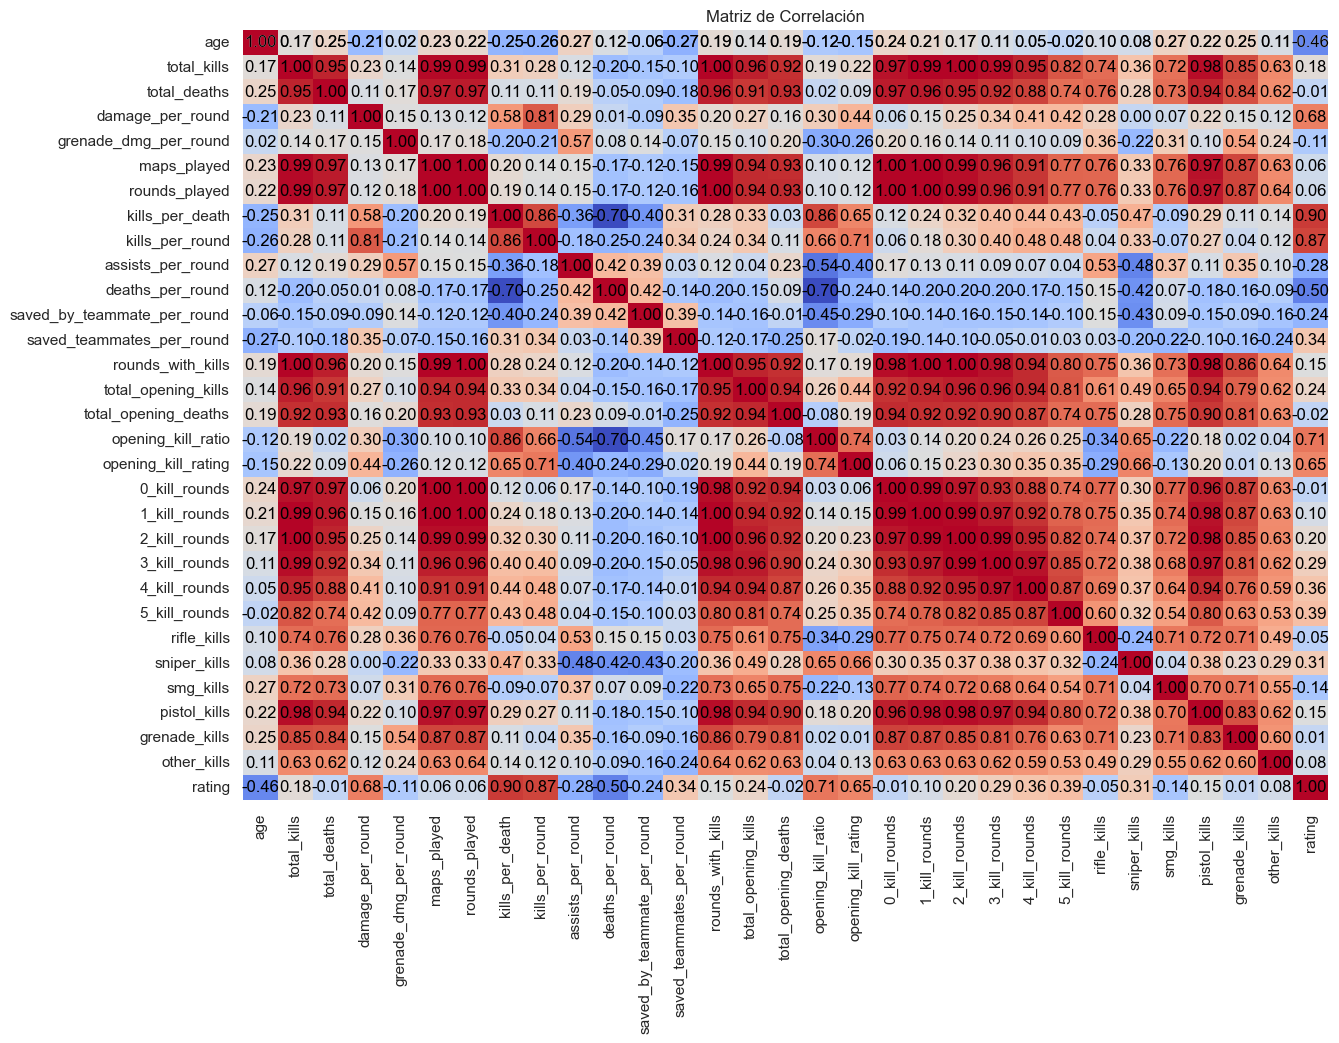

In [34]:
verificar_multicolinealidad(df_numeric)

In [35]:
df_model = df_numeric.copy()
df_model.drop(columns="total_deaths", inplace=True)
df_model.drop(columns="rounds_with_kills", inplace=True)


In [36]:
df_numeric.dropna(inplace=True)
y = df_numeric["maps_played"]
x = df_numeric["rounds_played"]

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary()) 
df_model.drop(columns="maps_played", inplace=True)

                            OLS Regression Results                            
Dep. Variable:            maps_played   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.712e+05
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:55:58   Log-Likelihood:                 2221.1
No. Observations:                 811   AIC:                            -4438.
Df Residuals:                     809   BIC:                            -4429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.2119      0.012   -266.987

In [37]:
df_numeric.dropna(inplace=True)
y = df_numeric["total_opening_kills"]
x = df_numeric["0_kill_rounds"]

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary()) 
df_model.drop(columns="total_opening_kills", inplace=True)

                             OLS Regression Results                            
Dep. Variable:     total_opening_kills   R-squared:                       0.840
Model:                             OLS   Adj. R-squared:                  0.840
Method:                  Least Squares   F-statistic:                     4256.
Date:                 Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                         20:55:58   Log-Likelihood:                 145.86
No. Observations:                  811   AIC:                            -287.7
Df Residuals:                      809   BIC:                            -278.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9533      0.147 

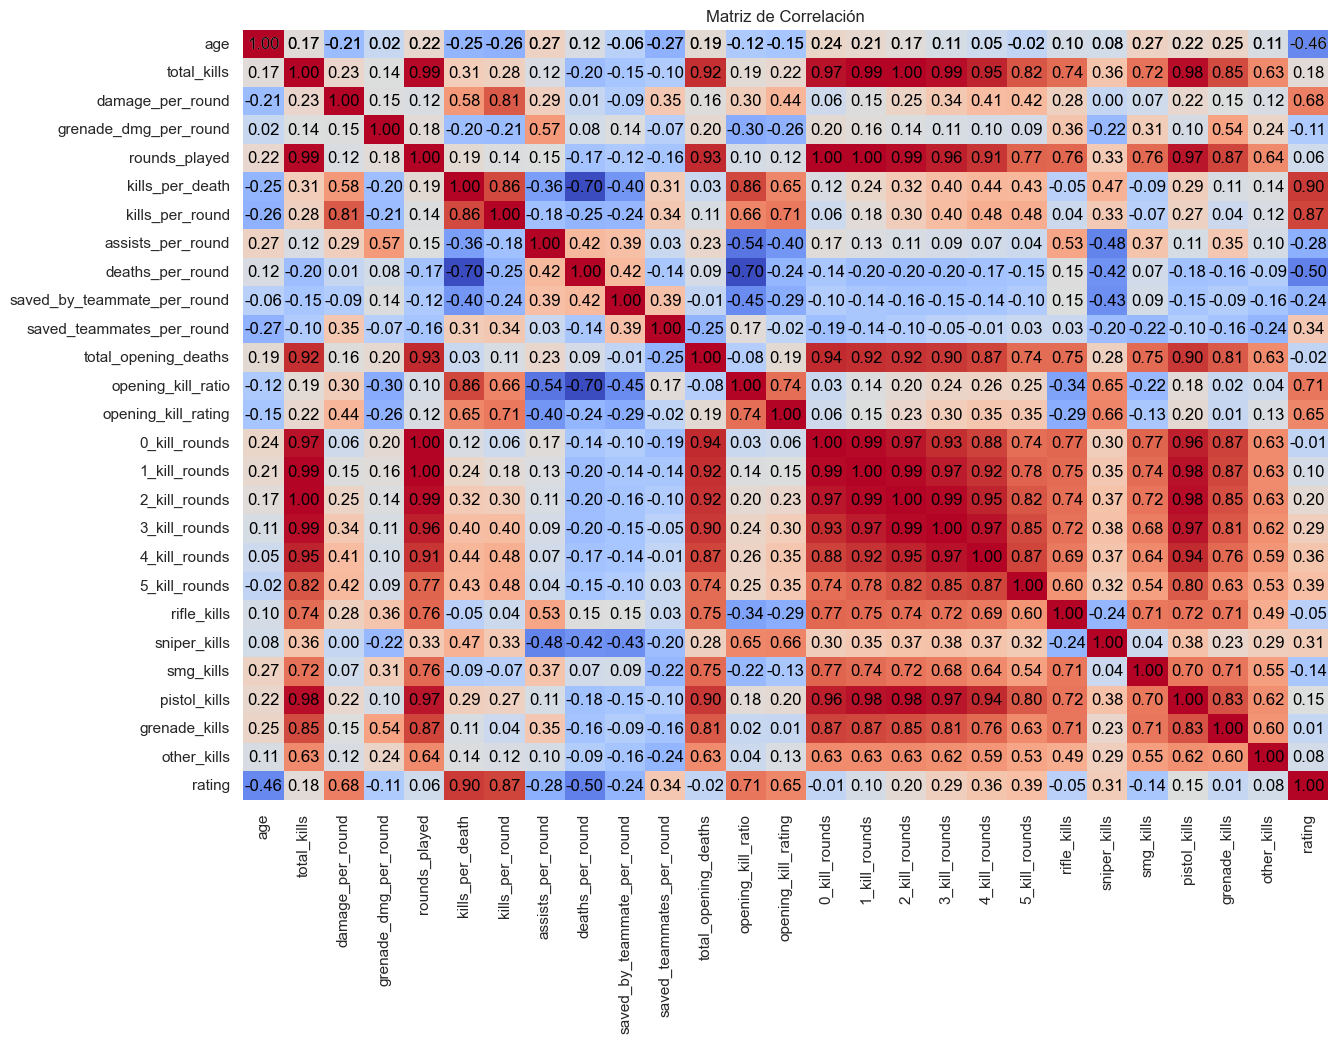

In [38]:
verificar_multicolinealidad(df_model)

In [39]:
y = df_numeric["total_kills"]
x = df_numeric.drop(columns=["total_kills"])

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.520e+07
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:00   Log-Likelihood:                 4851.5
No. Observations:                 811   AIC:                            -9641.
Df Residuals:                     780   BIC:                            -9495.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [40]:
y = df_model['total_kills']
X = df_model.drop(columns='total_kills')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (648, 26) (648,)
Dimensiones del conjunto de prueba: (163, 26) (163,)


In [41]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R cuadrado del conjunto de entrenamiento:", r2_train)
print("R cuadrado del conjunto de prueba:", r2_test)

mse_test = mean_squared_error(y_test, y_test_pred)

print("Error cuadrático medio (MSE) del conjunto de prueba:", mse_test)


R cuadrado del conjunto de entrenamiento: 0.9999922875277294
R cuadrado del conjunto de prueba: 0.9999913003826951
Error cuadrático medio (MSE) del conjunto de prueba: 1.7220659402180387e-06


# Prueba de predicción

In [42]:

new_players_data = pd.DataFrame({
    'age': [25, 22, 20, 28, 30],
    'total_kills': [3000, 3500, 4000, 2500, 2800],
    'damage_per_round': [70, 65, 80, 75, 85],
    'grenade_dmg_per_round': [10, 15, 5, 20, 10],
    'rounds_played': [800, 900, 1000, 750, 700],
    'kills_per_death': [1.4, 1.3, 1.6, 1.2, 1.5],
    'kills_per_round': [0.4, 0.5, 0.6, 0.3, 0.4],
    'assists_per_round': [0.2, 0.3, 0.4, 0.2, 0.1],
    'deaths_per_round': [0.3, 0.4, 0.2, 0.5, 0.3],
    'saved_by_teammate_per_round': [0.1, 0.2, 0.1, 0.3, 0.2],
    'saved_teammates_per_round': [0.3, 0.4, 0.2, 0.5, 0.4],
    'total_opening_deaths': [150, 120, 180, 130, 140],
    'opening_kill_ratio': [1.2, 1.4, 1.3, 1.1, 1.5],
    'opening_kill_rating': [1.3, 1.5, 1.4, 1.2, 1.6],
    '0_kill_rounds': [100, 90, 110, 80, 70],
    '1_kill_rounds': [200, 220, 180, 250, 230],
    '2_kill_rounds': [300, 280, 320, 270, 300],
    '3_kill_rounds': [180, 200, 220, 160, 180],
    '4_kill_rounds': [90, 100, 80, 110, 120],
    '5_kill_rounds': [30, 40, 20, 50, 60],
    'rifle_kills': [2500, 2700, 3000, 2300, 2600],
    'sniper_kills': [300, 350, 400, 250, 280],
    'smg_kills': [400, 450, 500, 350, 380],
    'pistol_kills': [500, 550, 600, 450, 480],
    'grenade_kills': [50, 60, 40, 70, 80],
    'other_kills': [100, 110, 90, 120, 130],
    'rating': [1.2, 1.4, 1.3, 1.1, 1.5]
})


In [43]:
new_players_data_no_kills = new_players_data.drop(['total_kills'], axis=1)

X = df_model
y = df_model["total_kills"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_no_kills = LinearRegression()
model_no_kills.fit(X_train, y_train) 

predicted_total_kills_no_kills = model_no_kills.predict(new_players_data)

print("Predicciones del número total de muertes para los jugadores nuevos:")
for i, prediction in enumerate(predicted_total_kills_no_kills):
    print(f"Jugador {i+1}: {prediction}")


Predicciones del número total de muertes para los jugadores nuevos:
Jugador 1: 3000.000000000003
Jugador 2: 3500.0000000000045
Jugador 3: 4000.000000000005
Jugador 4: 2500.000000000002
Jugador 5: 2800.0000000000036


# Modelo con PCA

In [44]:

from sklearn.preprocessing import StandardScaler

X = df_numeric.drop('total_kills', axis=1) 
y = df_numeric['total_kills']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [46]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

predictions = model.predict(X_test_pca)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 0.0008220978953917098


In [47]:
new_players_data_no_kills = new_players_data.drop(['total_kills'], axis=1)

X = df_model
y = df_model["total_kills"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train) 

predicted_total_kills_no_kills = model.predict(new_players_data)

print("Predicciones del número total de muertes para los jugadores nuevos:")
for i, prediction in enumerate(predicted_total_kills_no_kills):
    print(f"Jugador {i+1}: {prediction}")



Predicciones del número total de muertes para los jugadores nuevos:
Jugador 1: 3000.000000000003
Jugador 2: 3500.0000000000045
Jugador 3: 4000.000000000005
Jugador 4: 2500.000000000002
Jugador 5: 2800.0000000000036


# Pruebas

In [48]:
df_prueba_numeric = df_pros.select_dtypes(np.number)
df_prueba_numeric

age  total_kills  total_deaths  damage_per_round  grenade_dmg_per_round  \
0     21        22622         16458              88.0                    3.6   
1     24        35512         26413              86.4                    2.4   
2     21        18091         12492              78.6                    3.9   
3     21         8738          6397              80.4                    3.4   
4     27         8482          6517              80.2                    3.0   
..   ...          ...           ...               ...                    ...   
806   35        13472         16880              66.5                    2.6   
807   27         6753          8489              66.8                    6.6   
808   31        22470         28708              64.4                    4.5   
809   27         5654          7613              66.4                    4.7   
810   35         5530          7492              59.7                    3.6   

     maps_played  rounds_played  kills_per_death  kills_per_round  \
0           1020          26803             1.37             0.84   
1           1571          41491             1.34             0.86   
2            884          23451             1.45             0.77   
3            404          10913             1.37             0.80   
4            404          10701             1.30             0.79   
..           ...            ...              ...              ...   
806          899          23232             0.80             0.58   
807          455          11976             0.80             0.56   
808         1578          41153             0.78             0.55   
809          389          10334             0.74             0.55   
810          410          10602             0.74             0.52   

     assists_per_round  ...  3_kill_rounds  4_kill_rounds  5_kill_rounds  \
0                 0.12  ...           1474            369             71   
1                 0.10  ...           2262            504             64   
2                 0.11  ...           1075            221             30   
3                 0.10  ...            518            112              8   
4                 0.10  ...            524            114             14   
..                 ...  ...            ...            ...            ...   
806               0.16  ...            582            105              7   
807               0.14  ...            299             52              4   
808               0.14  ...            923            121             13   
809               0.14  ...            218             48              1   
810               0.12  ...            192             33              4   

     rifle_kills  sniper_kills  smg_kills  pistol_kills  grenade_kills  \
0           8261          8552       1290          4262            260   
1          14717         13451        901          6057            199   
2           3791         10580        550          3008            175   
3           2664          4348        181          1459             86   
4           2545          4412        264          1209             52   
..           ...           ...        ...           ...            ...   
806        10064            67        860          2256            118   
807         4770           120        586          1106            178   
808        16737           220       1514          3589            402   
809         4051           151        623           669             84   
810         3711           316        452           940             71   

     other_kills  rating  
0             49    1.32  
1            254    1.25  
2             70    1.26  
3             40    1.23  
4             28    1.22  
..           ...     ...  
806          108    0.83  
807           13    0.82  
808           50    0.81  
809           92    0.84  
810           51    0.77  

[811 rows x 31 columns]

In [49]:
def correlation_based_feature_selection(df, threshold=0.7):
    corr_matrix = df.corr().abs()
    
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    df_cleaned = df.drop(columns=to_drop)
    
    return df_cleaned

In [50]:
def train_linear_regression_model(df):
    X = df.drop(columns=['target_variable'])
    y = df['target_variable']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    X_train = sm.add_constant(X_train) 
    model_summary = sm.OLS(y_train, X_train).fit()
    print(model_summary.summary())
    
    return model



Columna 'total_deaths' eliminada.
Columna 'maps_played' eliminada.
Columna 'rounds_played' eliminada.
Columna 'kills_per_round' eliminada.
Columna 'deaths_per_round' eliminada.
Columna 'rounds_with_kills' eliminada.
Columna 'total_opening_kills' eliminada.
Columna 'total_opening_deaths' eliminada.
Columna 'opening_kill_ratio' eliminada.
Columna 'opening_kill_rating' eliminada.
Columna '0_kill_rounds' eliminada.
Columna '1_kill_rounds' eliminada.
Columna '2_kill_rounds' eliminada.
Columna '3_kill_rounds' eliminada.
Columna '4_kill_rounds' eliminada.
Columna '5_kill_rounds' eliminada.
Columna 'rifle_kills' eliminada.
Columna 'smg_kills' eliminada.
Columna 'pistol_kills' eliminada.
Columna 'grenade_kills' eliminada.
Columna 'rating' eliminada.


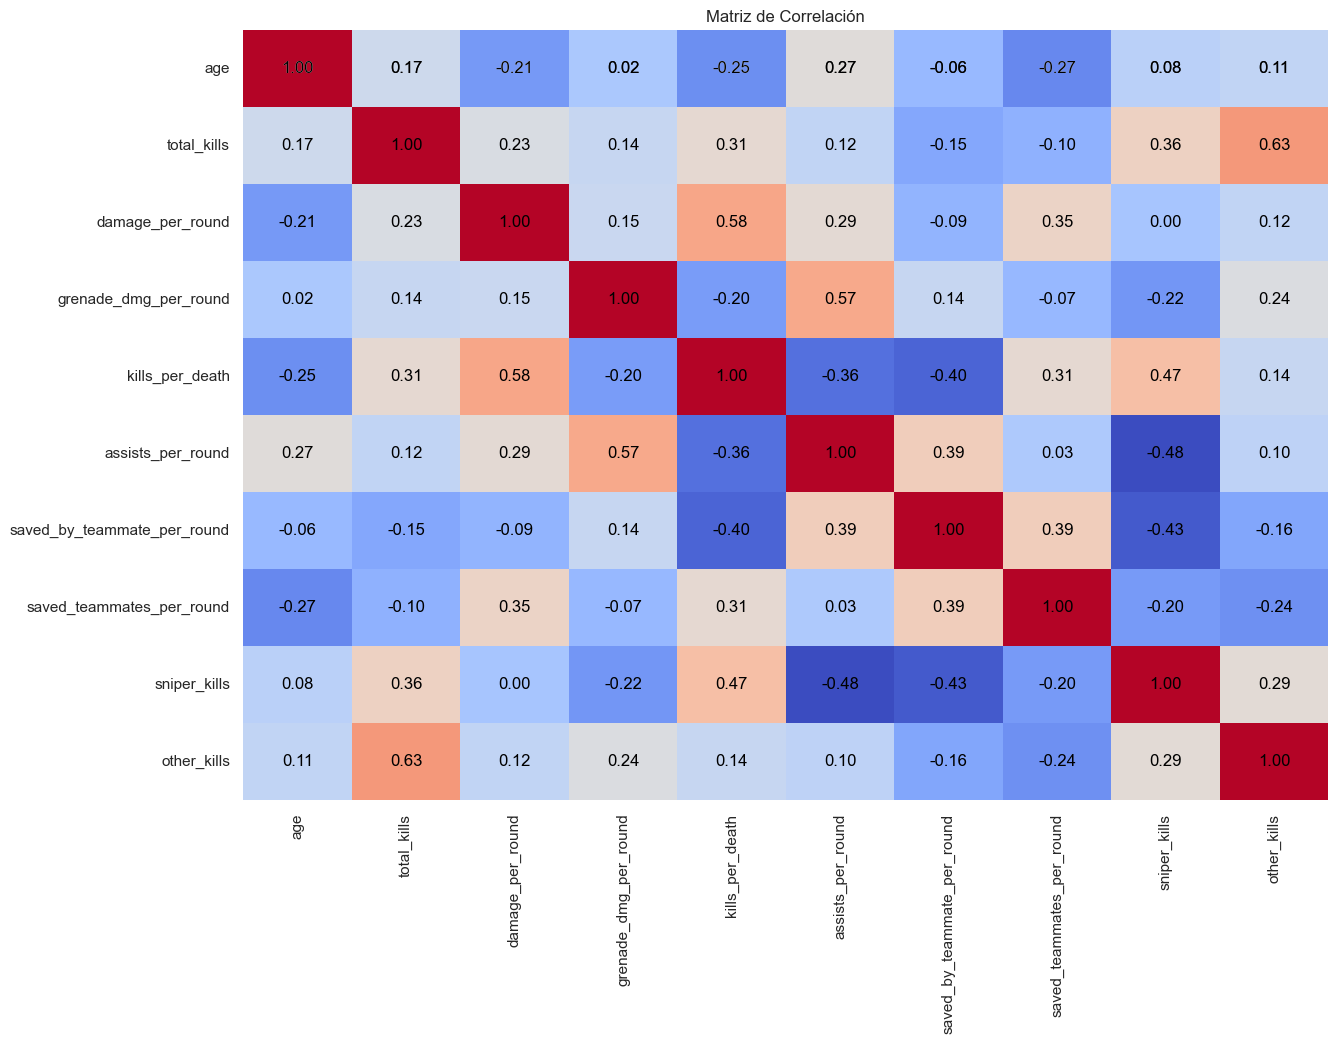

In [51]:
import pandas as pd
import numpy as np

def drop_correlated_columns(df, threshold):
    

    corr_matrix = df.corr().abs()


    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlated_columns = [column for column in upper.columns if any(upper[column] > threshold)]


    for column in correlated_columns:
        response = input(f"La columna '{column}' está altamente correlacionada. ¿Desea eliminarla? (si/no): ")
        if response.lower() == 'si':
            df.drop(column, axis=1, inplace=True)
            print(f"Columna '{column}' eliminada.")
        elif response.lower() == 'no':
            print(f"Columna '{column}' conservada.")

    return df

df_sin_col = drop_correlated_columns(df_prueba, 0.70)
verificar_multicolinealidad(df_sin_col)


In [52]:
y = df_sin_col["total_kills"]
x = df_sin_col.drop(columns=["total_kills"])

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     95.26
Date:                Thu, 16 May 2024   Prob (F-statistic):          2.98e-120
Time:                        20:56:21   Log-Likelihood:                -238.01
No. Observations:                 811   AIC:                             496.0
Df Residuals:                     801   BIC:                             543.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df_numeric
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

                       Variable           VIF
0                           age  1.240015e+02
1                   total_kills  1.821605e+08
2                  total_deaths  1.044594e+02
3              damage_per_round  3.747253e+03
4         grenade_dmg_per_round  2.444559e+02
5                   maps_played  2.599778e+05
6                 rounds_played  1.534671e+08
7               kills_per_death  3.123924e+04
8               kills_per_round  5.901646e+04
9             assists_per_round  3.076618e+02
10             deaths_per_round  4.812270e+04
11  saved_by_teammate_per_round  2.166239e+02
12    saved_teammates_per_round  1.601809e+02
13            rounds_with_kills  7.707094e+08
14          total_opening_kills  4.849544e+05
15         total_opening_deaths  2.768322e+05
16           opening_kill_ratio  4.127302e+03
17          opening_kill_rating  1.440863e+04
18                0_kill_rounds  4.573936e+07
19                1_kill_rounds  1.146515e+08
20                2_kill_rounds  5

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def drop_correlated_columns(df, threshold):
    
    variables = df.columns.tolist()
    dropped = True
    while dropped:
        dropped = False
        vif_data = pd.DataFrame()
        vif_data["Variable"] = variables
        vif_data["VIF"] = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]
        
        max_vif_index = vif_data["VIF"].idxmax()
        max_vif_variable = vif_data.loc[max_vif_index, "Variable"]
        max_vif_value = vif_data.loc[max_vif_index, "VIF"]

        if max_vif_value > threshold:
            response = input(f"La variable '{max_vif_variable}' tiene un VIF de {max_vif_value}, indicando multicolinealidad alta. ¿Desea eliminarla? (si/no): ")
            if response.lower() == 'si':
                df.drop(max_vif_variable, axis=1, inplace=True)
                print(f"Variable '{max_vif_variable}' eliminada.")
                variables.remove(max_vif_variable)
                dropped = True
            elif response.lower() == 'no':
                print(f"Variable '{max_vif_variable}' conservada.")
                variables.remove(max_vif_variable)
        else:
            print("No se encontraron variables con VIF mayor que el umbral especificado.")
            dropped = False

    return df

df_VIF = drop_correlated_columns(df_prueba_numeric, 1000)

c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

Variable 'rounds_played' eliminada.


c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

Variable 'rounds_with_kills' eliminada.
Variable 'total_kills' eliminada.
Variable 'rifle_kills' eliminada.
Variable 'kills_per_round' eliminada.
Variable 'maps_played' eliminada.
Variable 'total_deaths' eliminada.
Variable 'damage_per_round' eliminada.
Variable '1_kill_rounds' eliminada.
Variable 'kills_per_death' eliminada.
Variable 'opening_kill_rating' eliminada.
Variable '2_kill_rounds' eliminada.
No se encontraron variables con VIF mayor que el umbral especificado.


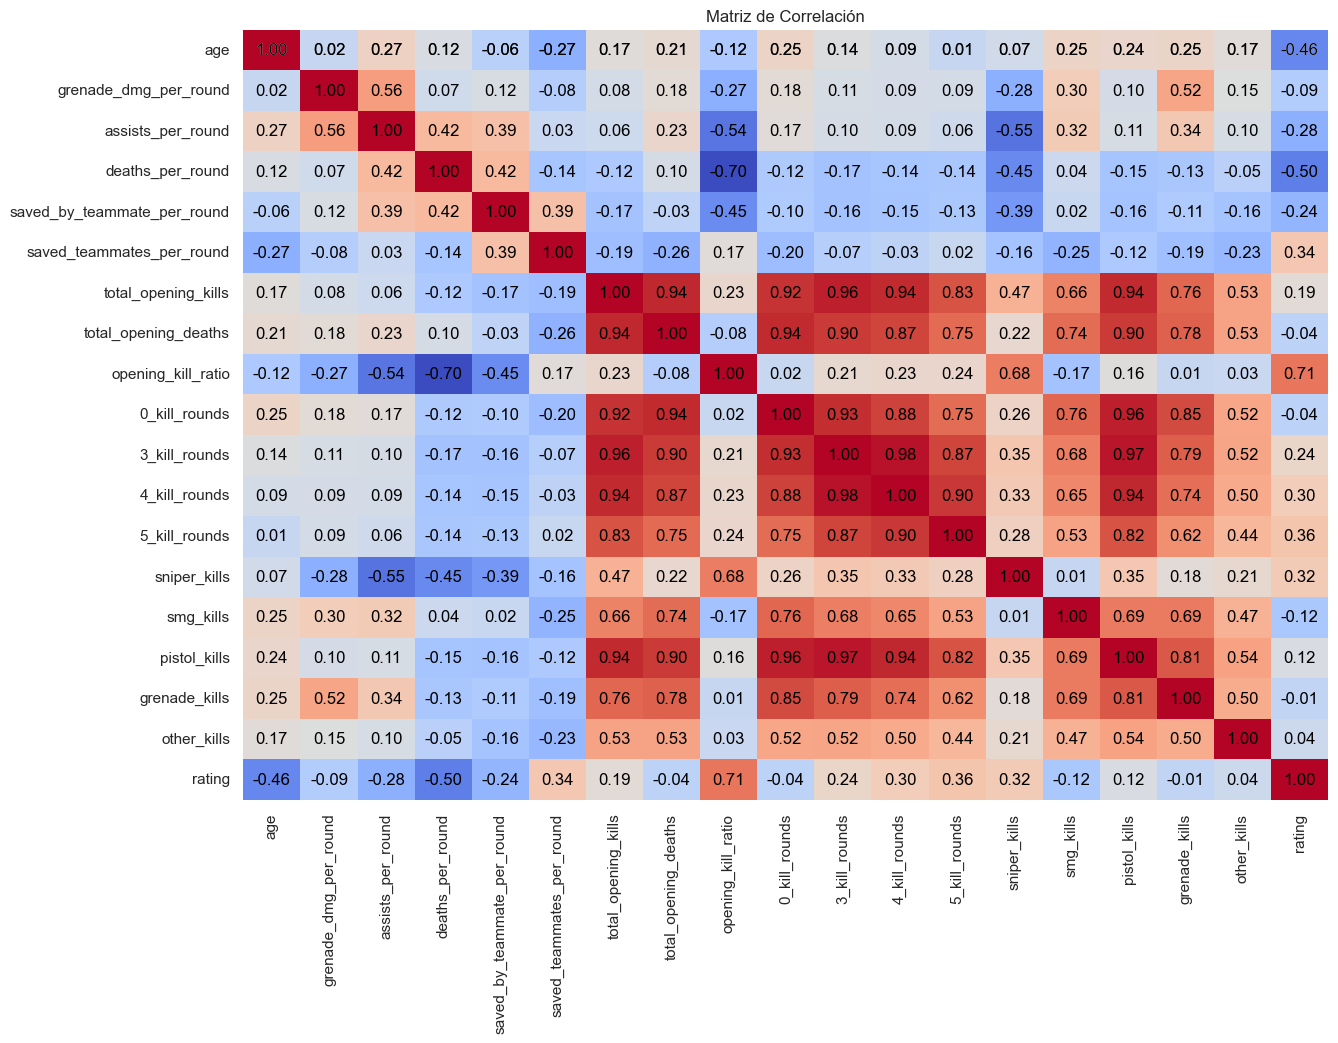

In [55]:
verificar_multicolinealidad(df_VIF)

In [56]:
y = df_model["total_kills"]
x = df_VIF

x_with_const = sm.add_constant(x)

modelo_stats = sm.OLS(y, x_with_const).fit()

print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     830.1
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:33   Log-Likelihood:                 700.25
No. Observations:                 811   AIC:                            -1361.
Df Residuals:                     791   BIC:                            -1267.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
df_modelo3 = df_pros.copy()
df_modelo3 = df_modelo3.select_dtypes(np.number)
df_modelo3_sin_total_kills = df_modelo3.drop(columns="total_kills")
df_modelo3.head()

age  total_kills  total_deaths  damage_per_round  grenade_dmg_per_round  \
0   21        22622         16458              88.0                    3.6   
1   24        35512         26413              86.4                    2.4   
2   21        18091         12492              78.6                    3.9   
3   21         8738          6397              80.4                    3.4   
4   27         8482          6517              80.2                    3.0   

   maps_played  rounds_played  kills_per_death  kills_per_round  \
0         1020          26803             1.37             0.84   
1         1571          41491             1.34             0.86   
2          884          23451             1.45             0.77   
3          404          10913             1.37             0.80   
4          404          10701             1.30             0.79   

   assists_per_round  ...  3_kill_rounds  4_kill_rounds  5_kill_rounds  \
0               0.12  ...           1474            369             71   
1               0.10  ...           2262            504             64   
2               0.11  ...           1075            221             30   
3               0.10  ...            518            112              8   
4               0.10  ...            524            114             14   

   rifle_kills  sniper_kills  smg_kills  pistol_kills  grenade_kills  \
0         8261          8552       1290          4262            260   
1        14717         13451        901          6057            199   
2         3791         10580        550          3008            175   
3         2664          4348        181          1459             86   
4         2545          4412        264          1209             52   

   other_kills  rating  
0           49    1.32  
1          254    1.25  
2           70    1.26  
3           40    1.23  
4           28    1.22  

[5 rows x 31 columns]

In [58]:
# df_modelo3.drop(columns="player_id", inplace=True)
df_modelo3_Vif = drop_correlated_columns(df_modelo3_sin_total_kills, 10)

c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

Variable 'rounds_played' eliminada.


c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\migue\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

Variable 'rounds_with_kills' eliminada.
Variable 'rifle_kills' eliminada.
Variable 'kills_per_round' eliminada.
Variable 'maps_played' eliminada.
Variable 'total_deaths' eliminada.
Variable 'damage_per_round' eliminada.
Variable '1_kill_rounds' eliminada.
Variable 'kills_per_death' eliminada.
Variable 'opening_kill_rating' eliminada.
Variable '2_kill_rounds' eliminada.
Variable 'rating' eliminada.
Variable 'total_opening_kills' eliminada.
Variable '3_kill_rounds' eliminada.
Variable 'deaths_per_round' eliminada.
Variable 'pistol_kills' eliminada.
Variable 'assists_per_round' eliminada.


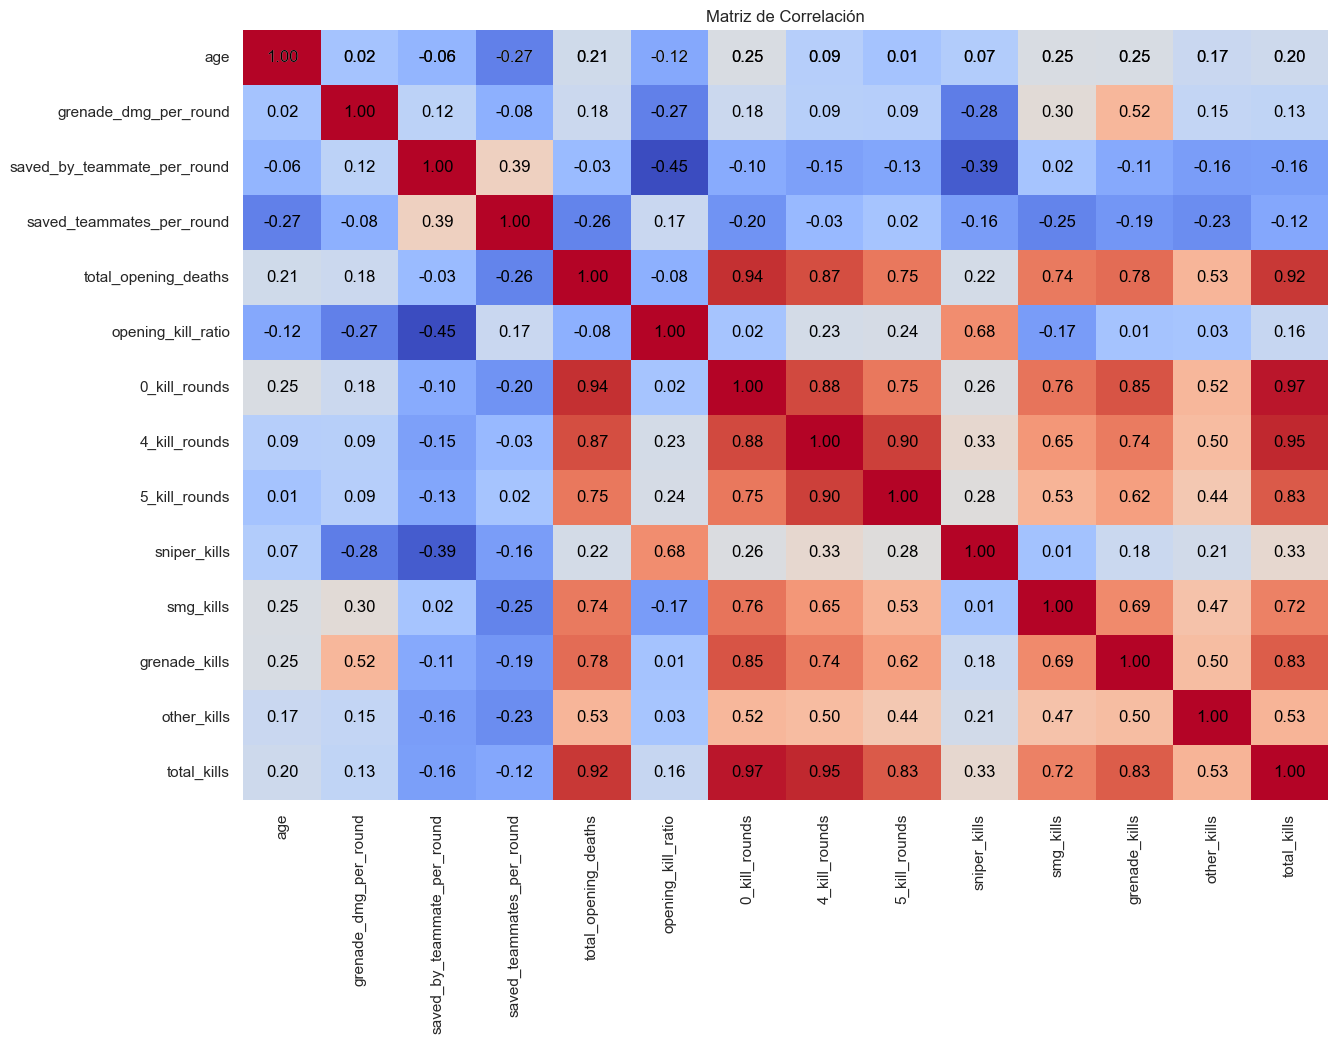

In [59]:
df_modelo3_Vif = pd.concat([df_modelo3_Vif, df_modelo3['total_kills']], axis=1)
verificar_multicolinealidad(df_modelo3_Vif)

In [60]:
df_modelo3_Vif.keys()

Index(['age', 'grenade_dmg_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'total_opening_deaths',
       'opening_kill_ratio', '0_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'sniper_kills', 'smg_kills', 'grenade_kills', 'other_kills',
       'total_kills'],
      dtype='object')

In [61]:
X = df_modelo3_Vif
y = df_model["total_kills"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

R-squared: 0.9407313381562534
                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     881.7
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:48   Log-Likelihood:                 545.96
No. Observations:                 648   AIC:                            -1062.
Df Residuals:                     633   BIC:                            -994.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

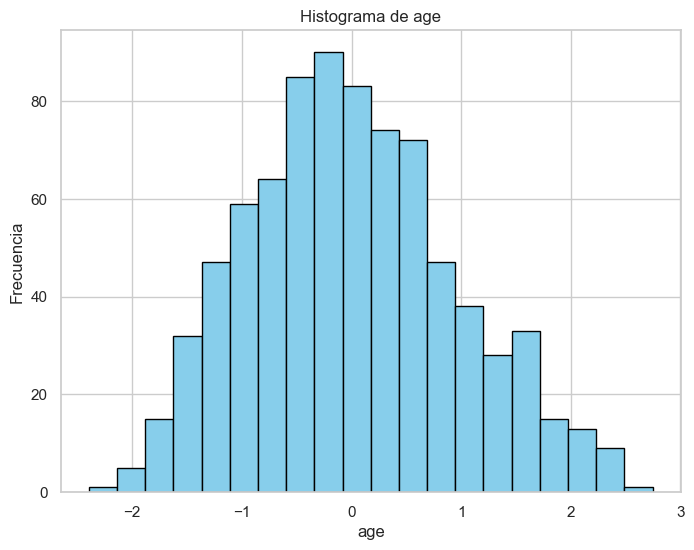

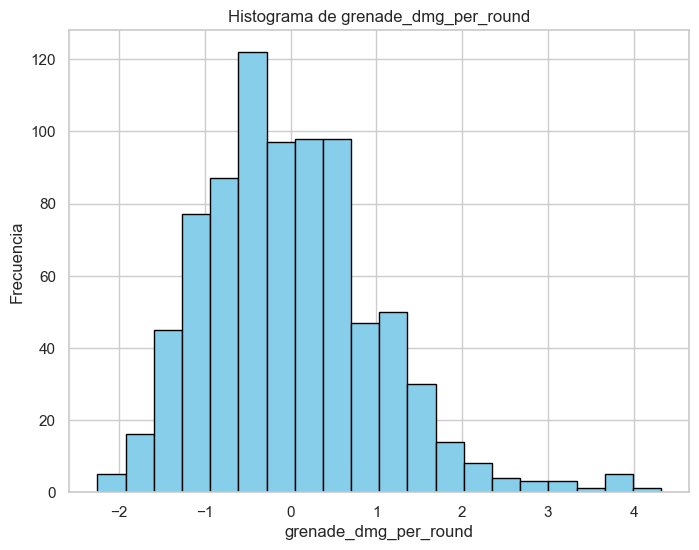

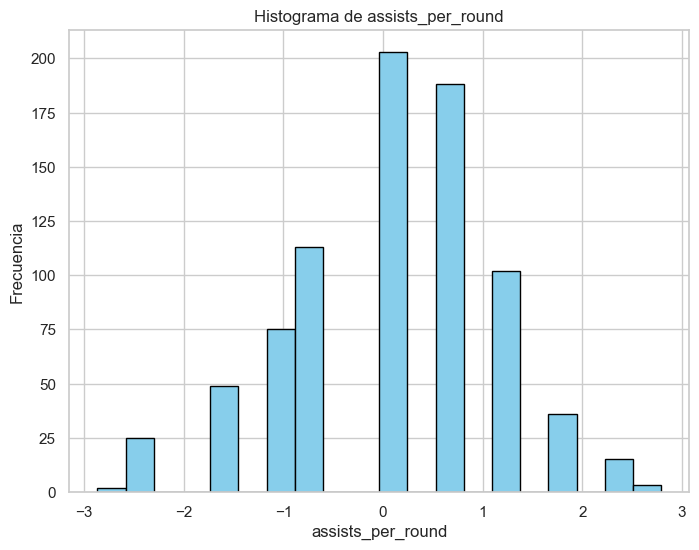

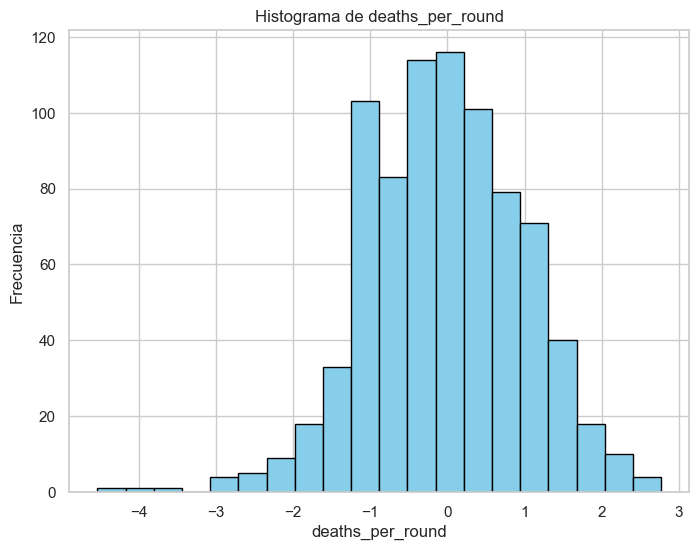

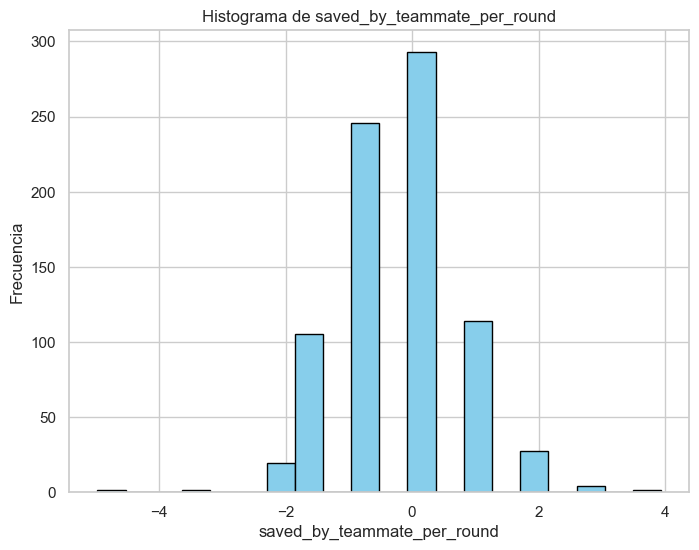

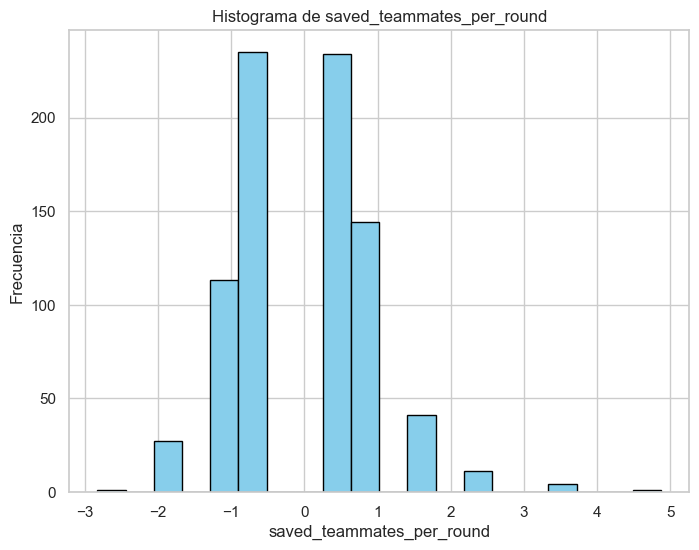

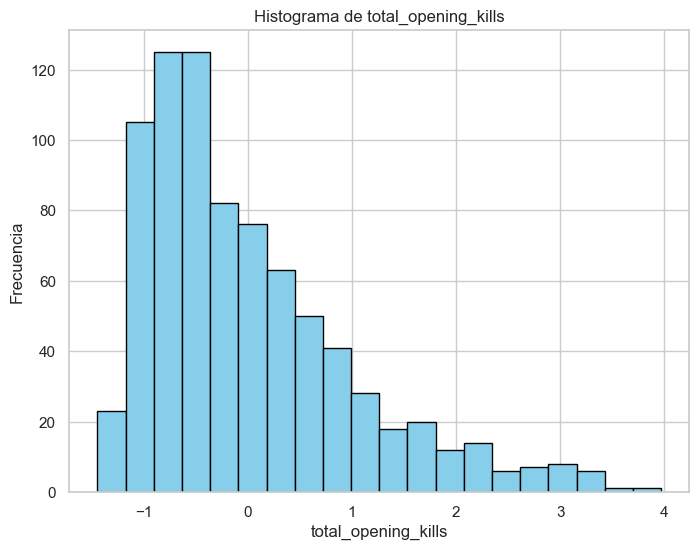

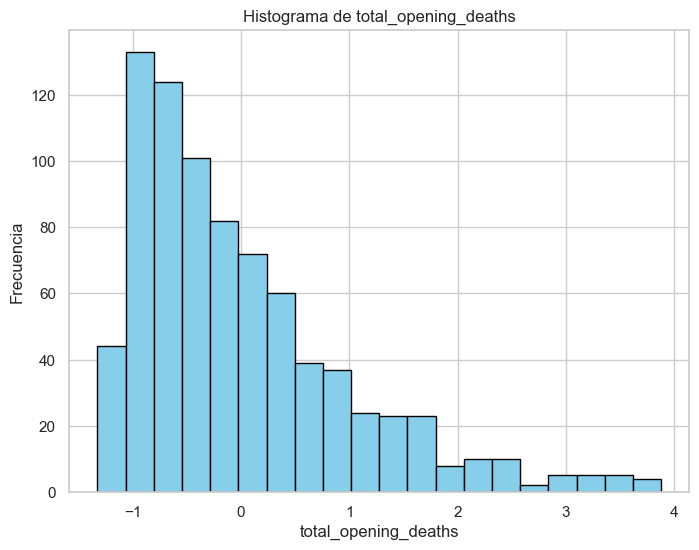

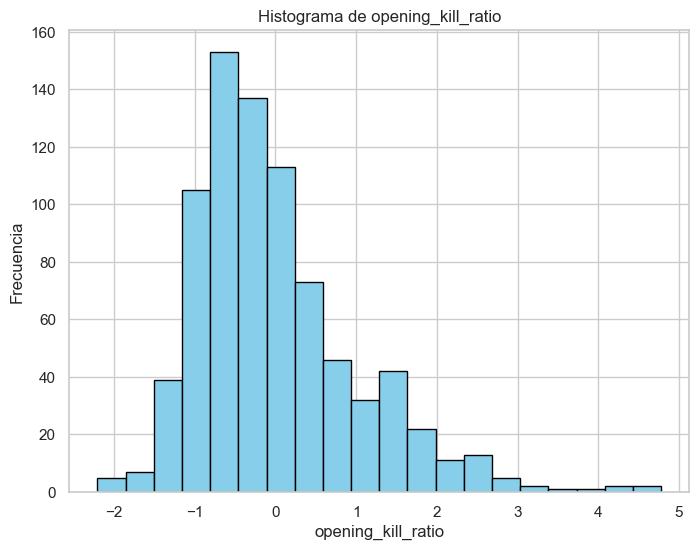

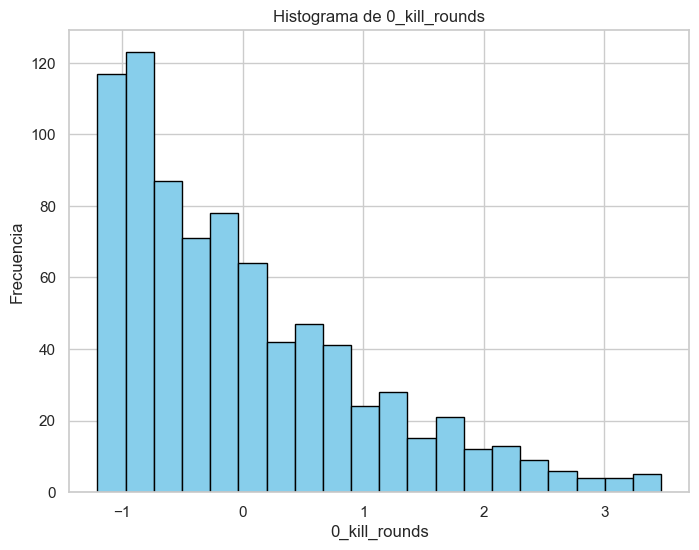

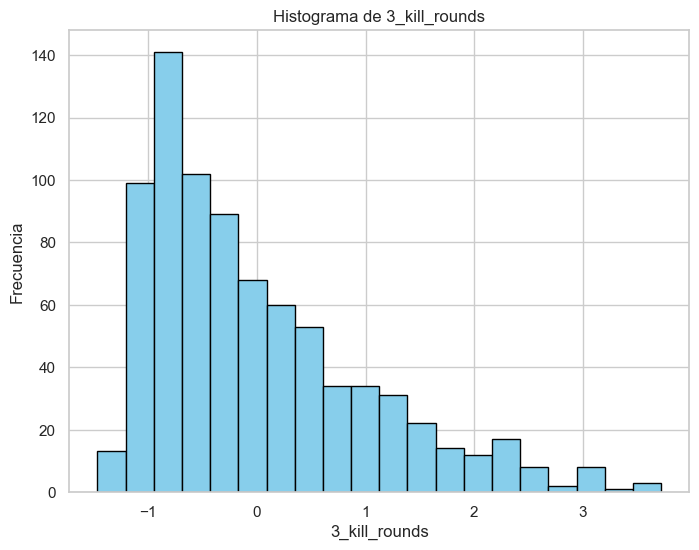

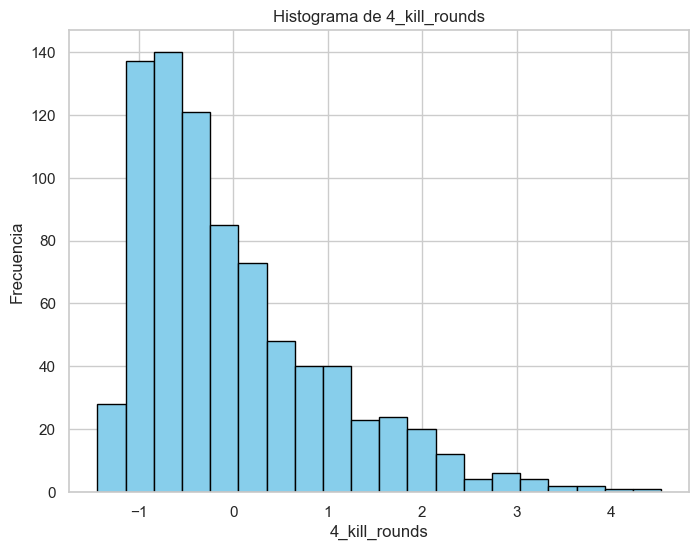

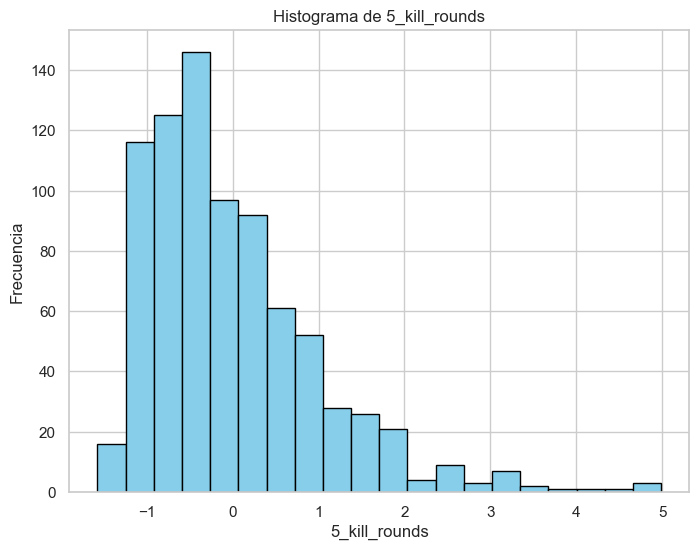

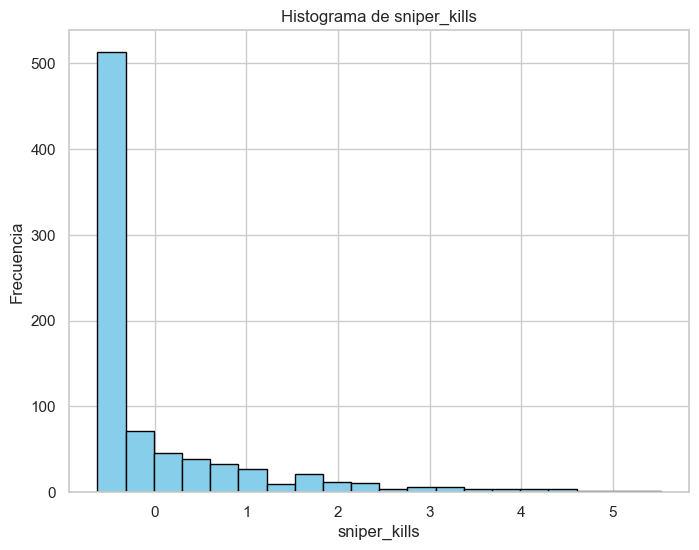

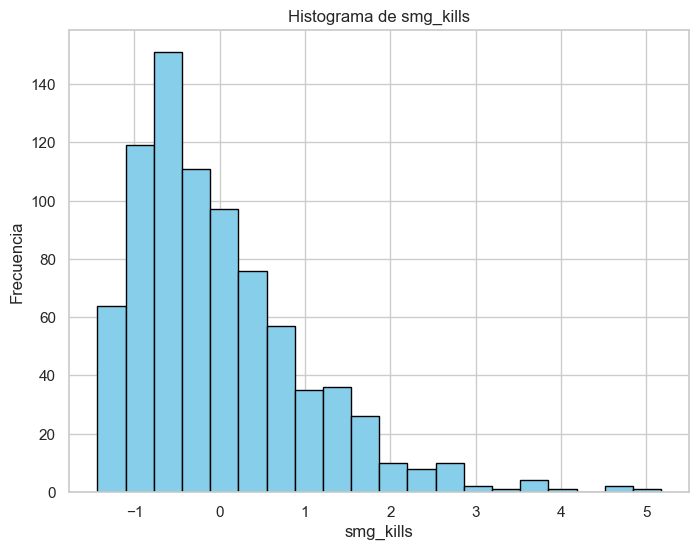

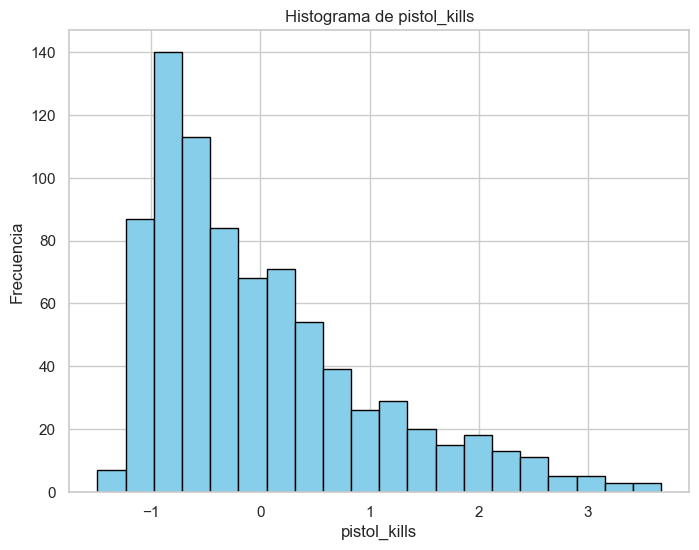

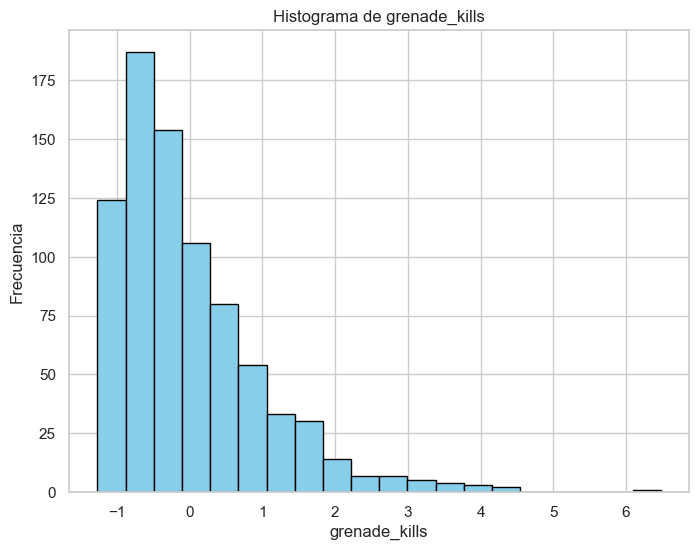

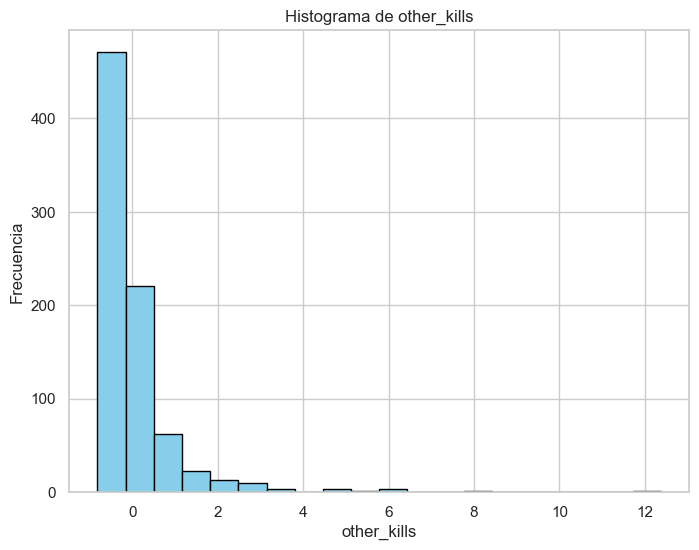

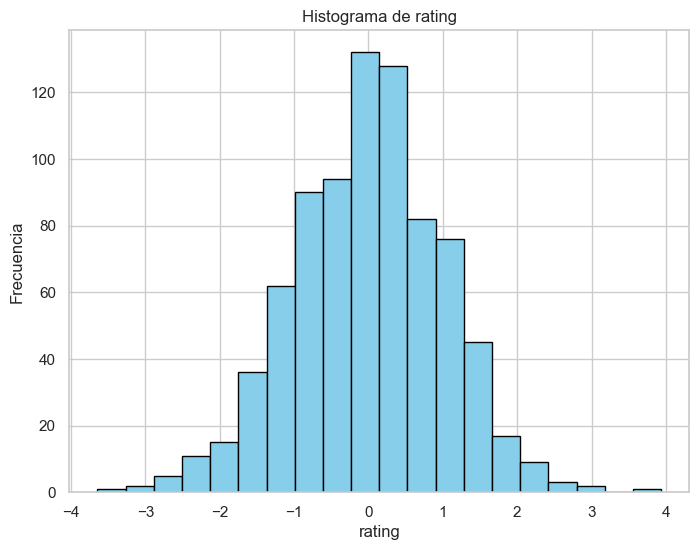

In [62]:

def standardize_dataframe(df):
    scaler = StandardScaler()
    
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    return df_standardized

df_estandarizado = standardize_dataframe(df_prueba_numeric)


def visualizar_histogramas_df(dataframe, bins=20):

    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(dataframe[column], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()


visualizar_histogramas_df(df_estandarizado)

In [63]:
df_estandarizado_sin_kills = df_estandarizado.copy()
# df_estandarizado_sin_kills.drop(columns="total_kills", inplace=True)
drop_correlated_columns(df_estandarizado_sin_kills, 10)

Variable 'total_opening_kills' eliminada.
Variable '3_kill_rounds' eliminada.
Variable '0_kill_rounds' eliminada.
Variable '4_kill_rounds' eliminada.
Variable 'pistol_kills' eliminada.
No se encontraron variables con VIF mayor que el umbral especificado.


age  grenade_dmg_per_round  assists_per_round  deaths_per_round  \
0   -1.313156              -0.398734          -0.603942         -1.880189   
1   -0.501235              -1.409803          -1.735113         -0.883783   
2   -1.313156              -0.145967          -1.169528         -4.537271   
3   -1.313156              -0.567246          -1.735113         -2.544459   
4    0.310686              -0.904269          -1.735113         -1.880189   
..        ...                    ...                ...               ...   
806  2.475809              -1.241292           1.658400          2.105435   
807  0.310686               2.128938           0.527229          1.441164   
808  1.393247               0.359567           0.527229          1.109029   
809  0.310686               0.528079           0.527229          2.437570   
810  2.475809              -0.398734          -0.603942          1.441164   

     saved_by_teammate_per_round  saved_teammates_per_round  \
0                       0.372489                   1.792549   
1                      -1.409744                   1.022142   
2                      -1.409744                   1.022142   
3                      -0.518627                   1.022142   
4                      -1.409744                   0.251736   
..                           ...                        ...   
806                     0.372489                  -2.059484   
807                     1.263605                  -0.518671   
808                     1.263605                  -0.518671   
809                    -0.518627                  -2.829891   
810                    -0.518627                  -1.289077   

     total_opening_deaths  opening_kill_ratio  5_kill_rounds  sniper_kills  \
0                0.355607            2.774944       4.986631      1.918977   
1                1.342949            2.826299       4.339891      3.379639   
2               -0.689661            4.623725       1.198582      2.523636   
3               -1.256821            3.442559      -0.834029      0.665532   
4               -1.114167            2.107329      -0.279681      0.684614   
..                    ...                 ...            ...           ...   
806              0.317566           -1.436168      -0.926421     -0.610871   
807             -0.678422           -1.795653      -1.203595     -0.595069   
808              1.999160           -1.898363      -0.372072     -0.565254   
809             -0.752775           -2.155138      -1.480769     -0.585826   
810             -1.073532           -2.206493      -1.203595     -0.536631   

     smg_kills  grenade_kills  other_kills    rating  
0     0.875753       0.503935    -0.212665  3.934106  
1     0.117712       0.013280     2.499152  2.969566  
2    -0.566279      -0.179764     0.065131  3.107358  
3    -1.285347      -0.895638    -0.331721  2.693983  
4    -1.123605      -1.169118    -0.490461  2.556192  
..         ...            ...          ...       ...  
806   0.037816      -0.638245     0.567809 -2.817673  
807  -0.496126      -0.155634    -0.688887 -2.955464  
808   1.312261       1.646115    -0.199437 -3.093256  
809  -0.424024      -0.911725     0.356155 -2.679881  
810  -0.757251      -1.016291    -0.186209 -3.644421  

[811 rows x 14 columns]

In [64]:
df_estandarizado_sin_kills.head()

age  grenade_dmg_per_round  assists_per_round  deaths_per_round  \
0 -1.313156              -0.398734          -0.603942         -1.880189   
1 -0.501235              -1.409803          -1.735113         -0.883783   
2 -1.313156              -0.145967          -1.169528         -4.537271   
3 -1.313156              -0.567246          -1.735113         -2.544459   
4  0.310686              -0.904269          -1.735113         -1.880189   

   saved_by_teammate_per_round  saved_teammates_per_round  \
0                     0.372489                   1.792549   
1                    -1.409744                   1.022142   
2                    -1.409744                   1.022142   
3                    -0.518627                   1.022142   
4                    -1.409744                   0.251736   

   total_opening_deaths  opening_kill_ratio  5_kill_rounds  sniper_kills  \
0              0.355607            2.774944       4.986631      1.918977   
1              1.342949            2.826299       4.339891      3.379639   
2             -0.689661            4.623725       1.198582      2.523636   
3             -1.256821            3.442559      -0.834029      0.665532   
4             -1.114167            2.107329      -0.279681      0.684614   

   smg_kills  grenade_kills  other_kills    rating  
0   0.875753       0.503935    -0.212665  3.934106  
1   0.117712       0.013280     2.499152  2.969566  
2  -0.566279      -0.179764     0.065131  3.107358  
3  -1.285347      -0.895638    -0.331721  2.693983  
4  -1.123605      -1.169118    -0.490461  2.556192

In [65]:
X = df_estandarizado_sin_kills
y = df_model["total_kills"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

R-squared: 0.887540316422847
                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     533.2
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                 393.16
No. Observations:                 648   AIC:                            -756.3
Df Residuals:                     633   BIC:                            -689.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [66]:
df_estandarizado_sin_kills.drop(columns="assists_per_round", inplace=True)
df_estandarizado_sin_kills.drop(columns="sniper_kills", inplace=True)
df_estandarizado_sin_kills.drop(columns="opening_kill_ratio", inplace=True)

In [67]:
X = df_estandarizado_sin_kills
y = df_model["total_kills"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


R-squared: 0.8860758387094547
                            OLS Regression Results                            
Dep. Variable:            total_kills   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     678.5
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                 391.69
No. Observations:                 648   AIC:                            -759.4
Df Residuals:                     636   BIC:                            -705.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

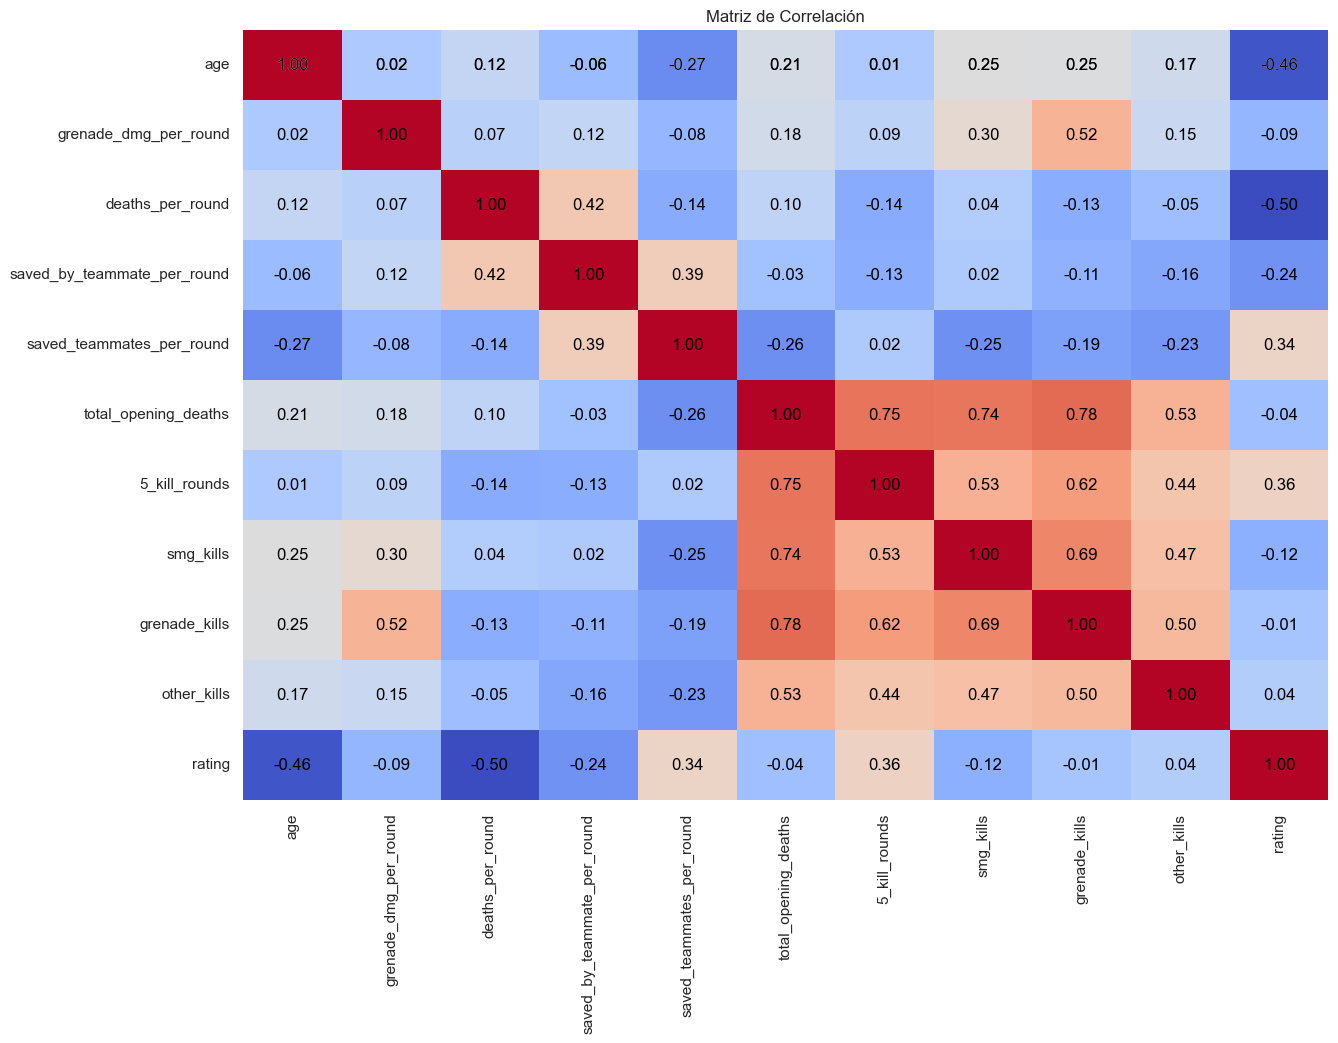

In [68]:
verificar_multicolinealidad(df_estandarizado_sin_kills)

In [69]:


def calculate_vif(df):
    X = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns

    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

vif_df = calculate_vif(df_estandarizado_sin_kills)
print(vif_df)


                       Variable       VIF
0                         const  1.000000
1                           age  1.494668
2         grenade_dmg_per_round  2.134244
3              deaths_per_round  1.921602
4   saved_by_teammate_per_round  1.873278
5     saved_teammates_per_round  1.880399
6          total_opening_deaths  7.077094
7                 5_kill_rounds  3.715690
8                     smg_kills  2.607163
9                 grenade_kills  6.099491
10                  other_kills  1.498728
11                       rating  2.492132
